# Importing Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score,accuracy_score,r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [8]:
# dataset = dataset.replace('?', np.nan)
# dataset = dataset.apply(lambda x: x.fillna(x.median()),axis=0)
 

# Importing Data Set

In [9]:
df=pd.read_csv(r"C:\Users\udayr\termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [10]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [11]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [15]:
df.isna()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31643,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [17]:
df.isin([" "]).sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [18]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [19]:
# features=[feature for feature in df.columns if((df[i].dtypes=='o') & (feature not in "deposit"))]
# features


In [20]:
for i in df.columns:
    print(i,df[i].nunique())

ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


In [21]:
for i in df.columns:
    print(i,df[i].dtypes=="object")

ID False
age False
job True
marital True
education True
default True
balance False
housing True
loan True
contact True
day False
month True
duration False
campaign False
pdays False
previous False
poutcome True
subscribed True


# Dividation columns into categorical data and continous data

In [22]:
cat=df.select_dtypes("object")
cat

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


In [23]:
con=df.select_dtypes("int")
con

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0
31643,40178,53,380,5,438,2,-1,0
31644,19710,32,312,7,37,3,-1,0
31645,38556,57,225,15,22,7,337,12


''' Seperation was done because of seperate analysis '''

In [24]:
conti=con.columns
conti

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

### Here i used describe to know count, outlier, standard deviation, mean and etc of data.

In [25]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
# Categorical Analyze 

Text(0.5, 1.0, 'Job-Age')

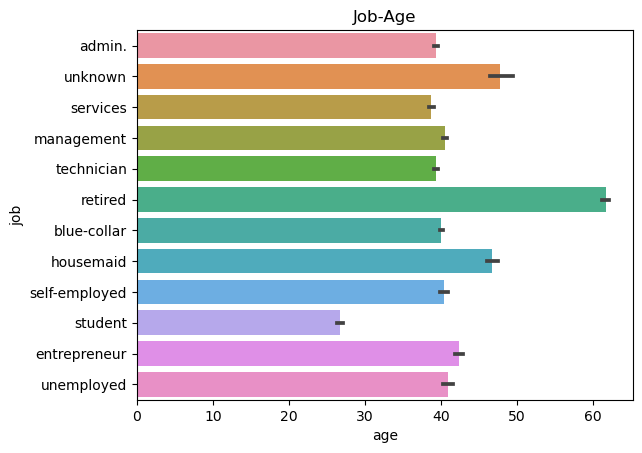

In [27]:
sns.barplot(x=df["age"],y=df["job"])
plt.title("Job-Age")

In [28]:
# sns.barplot(x=con["age"],y=cat["marital"])
# plt.title("age"-"marital")

<AxesSubplot: xlabel='age', ylabel='balance'>

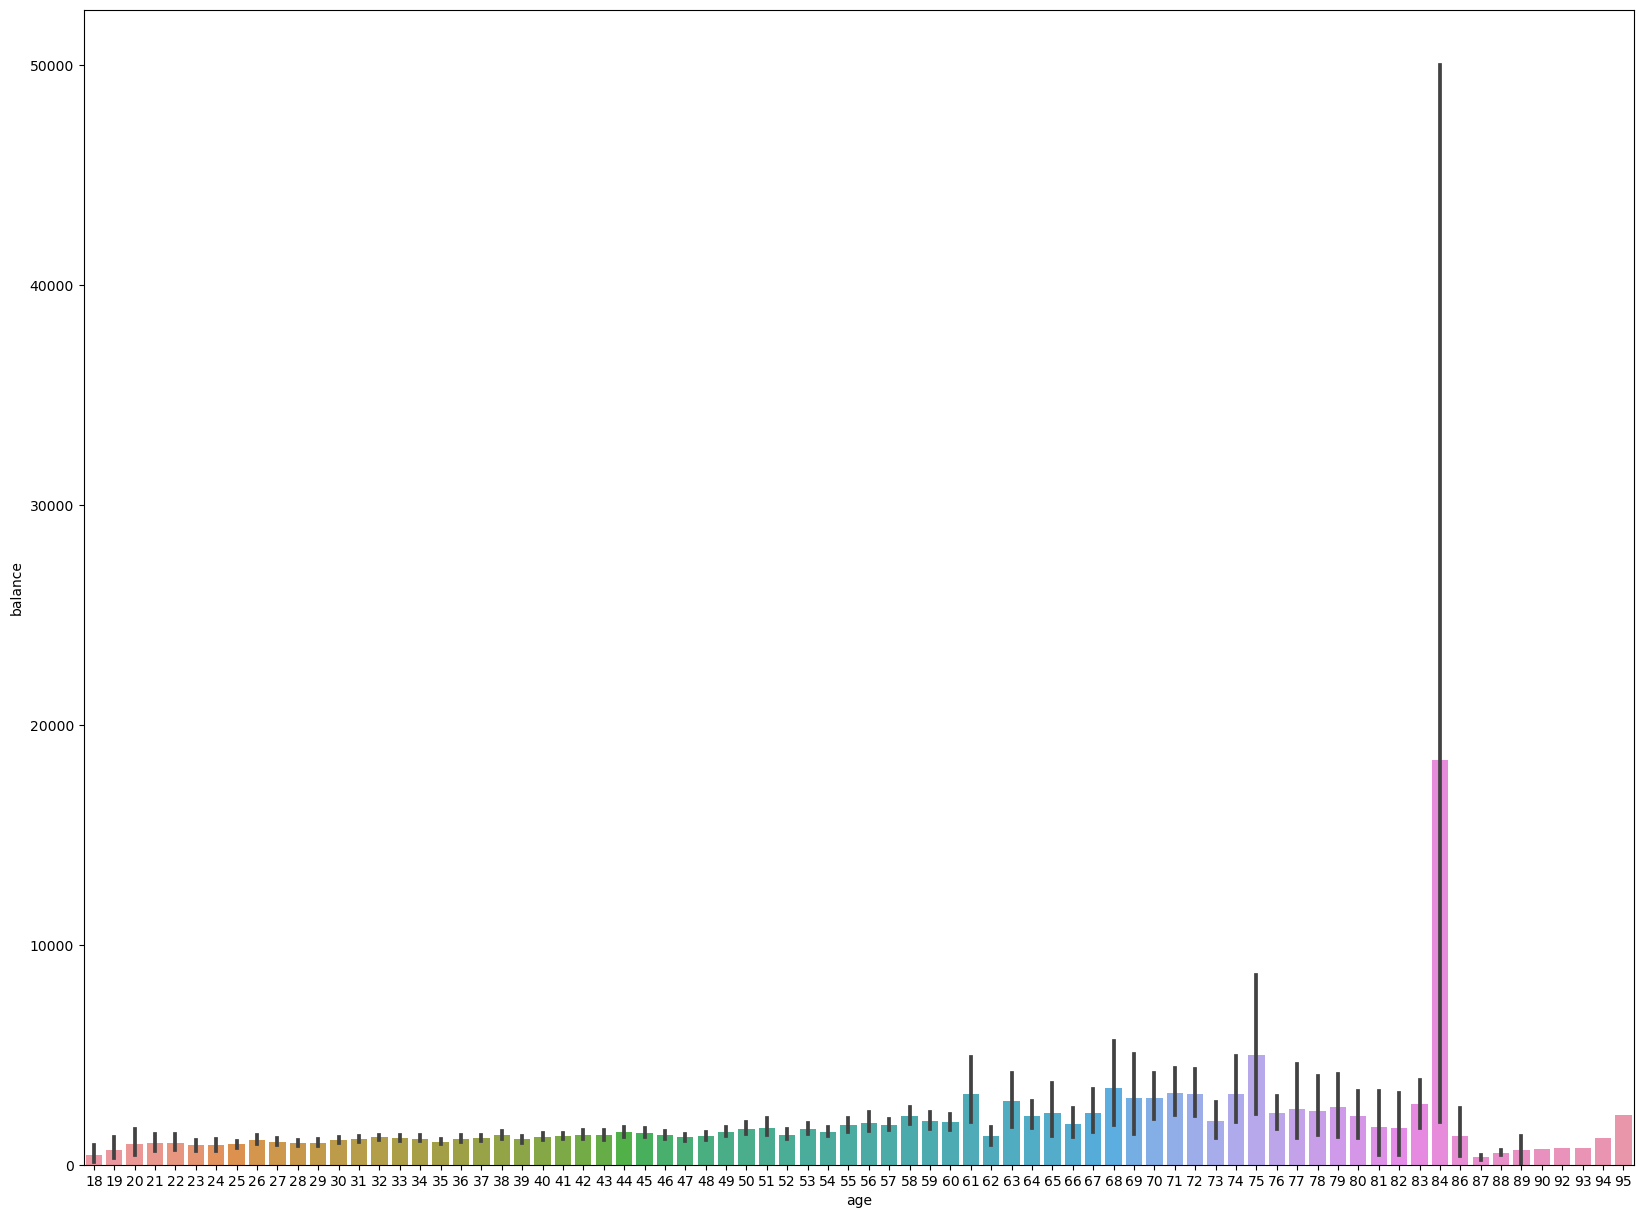

In [29]:
plt.figure(figsize=(20,15))
sns.barplot(x ='age', y='balance',data = df)

Text(0.5, 1.0, 'Job-balance')

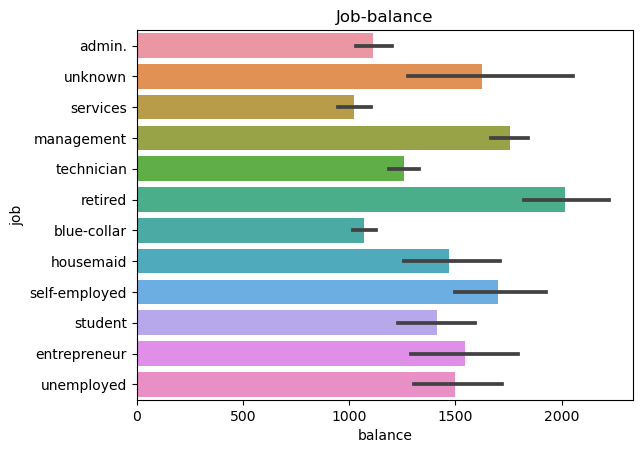

In [30]:
sns.barplot(x=con["balance"],y=cat["job"])
plt.title("Job-balance")

<AxesSubplot: xlabel='subscribed', ylabel='count'>

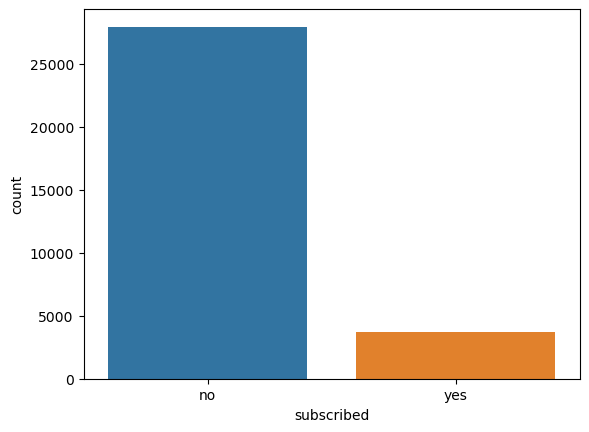

In [31]:
sns.countplot(x=cat["subscribed"])

<AxesSubplot: xlabel='subscribed', ylabel='count'>

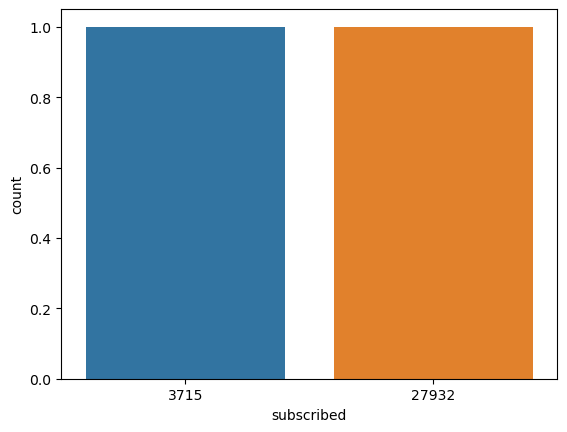

In [32]:
sns.countplot(x=cat["subscribed"].value_counts())

In [33]:
# for i in df:              
#     plt.figure(figsize = (8, 4))
#     sns.histplot(x=df[i])
#     plt.title(i)
#     plt.xticks(rotation=90)
#     plt.show()

In [34]:
# sns.countplot(con["age"])

In [35]:
# #Count plot for all categorical columns
# for i in x:              
#     plt.figure(figsize = (8, 4))
#     sns.countplot(x=x[i])
#     plt.title(i)
#     plt.xticks(rotation=90)
#     plt.show()

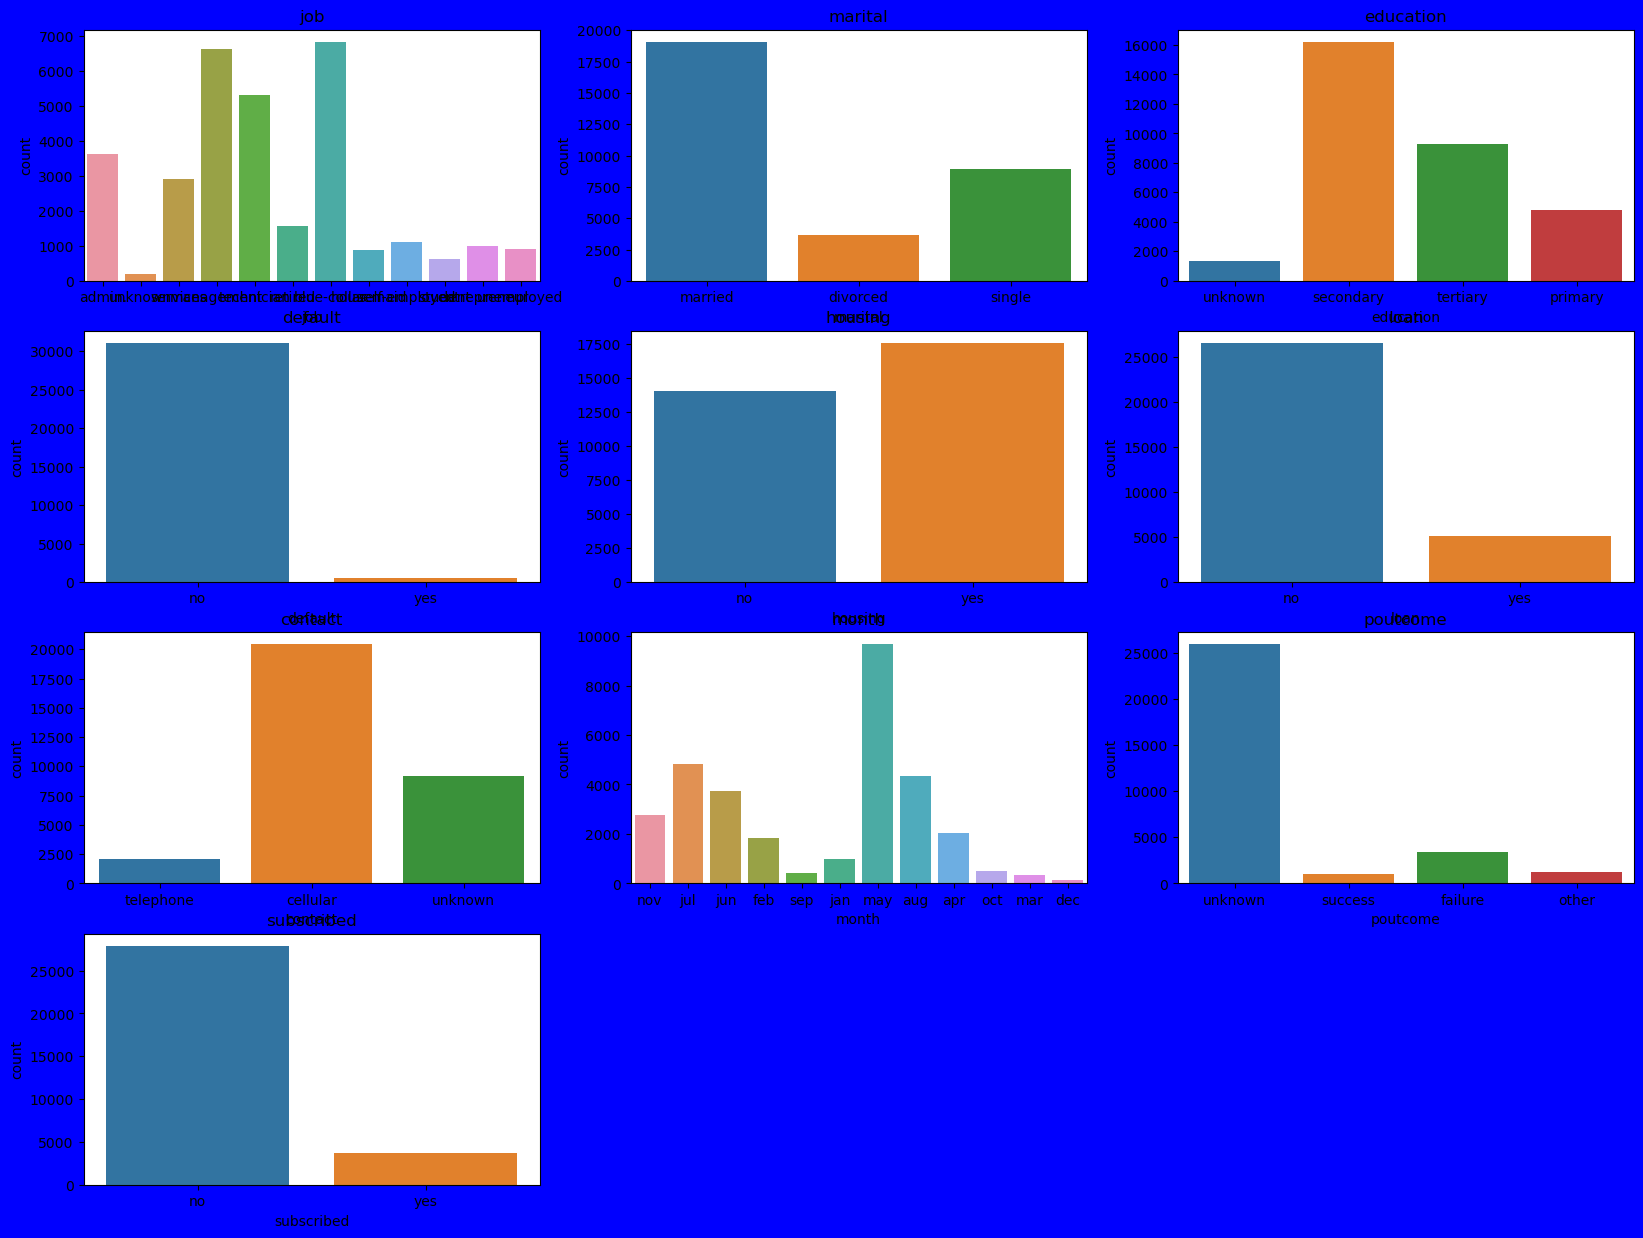

In [36]:
plt.figure(figsize=(20,15),facecolor="blue")
plotnumber=1
for i in cat:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.countplot(x=i,data=cat)
        plt.xlabel(i)
        plt.title(i)
    plotnumber+=1
plt.show()

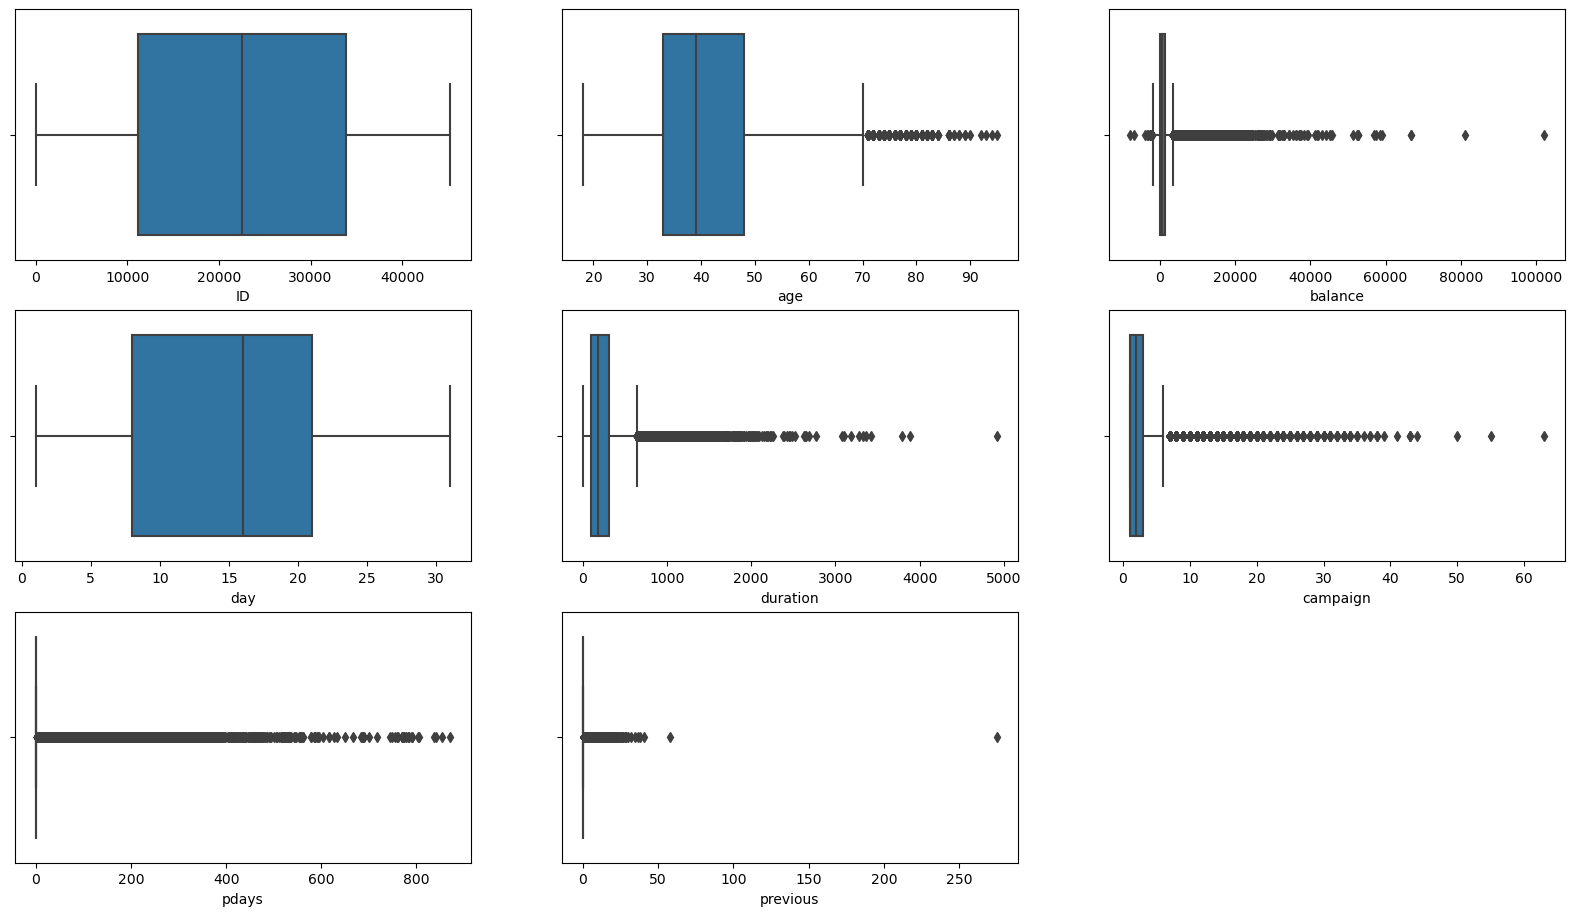

In [37]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in con:
    
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(x=i,data=con)
#         plt.title(i)
        plt.xlabel(i)
    plotnumber+=1
plt.show()


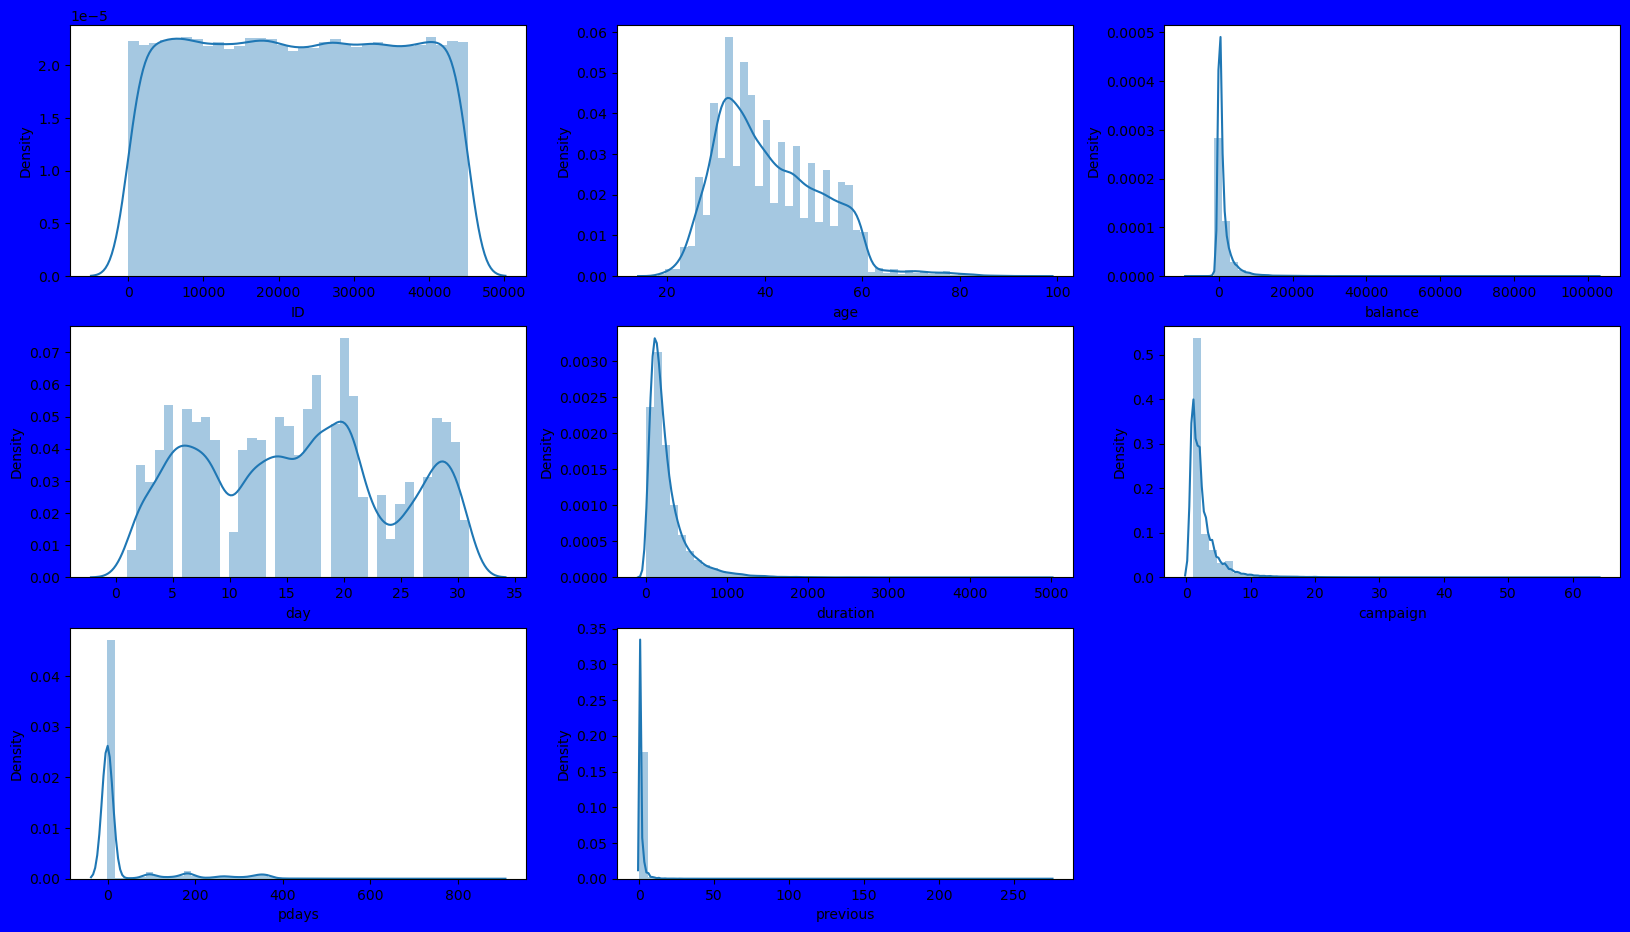

In [38]:
plt.figure(figsize=(20,15),facecolor="blue")
plotnumber=1
for i in con:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(con[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
lecode=LabelEncoder()
#X=lecode.fit_transform(x)
#X
cate=cat.apply(LabelEncoder().fit_transform)
cate

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,0,1,3,0,0,0,1,9,3,0
1,11,1,1,0,0,0,0,5,3,0
2,7,1,1,0,1,0,0,5,3,0
3,4,0,2,0,0,0,0,6,2,1
4,9,1,1,0,1,0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...
31642,4,2,2,0,1,0,0,8,3,0
31643,4,0,2,0,0,1,0,6,3,1
31644,4,2,2,0,0,0,0,1,3,0
31645,9,1,1,0,1,0,1,8,0,0


In [40]:
cat

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


In [41]:
x=pd.concat([con,cate],axis=1,join='inner')
x

,ID,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,26110,56,1933,19,44,2,-1,0,0,1,3,0,0,0,1,9,3,0
1,40576,31,3,20,91,2,-1,0,11,1,1,0,0,0,0,5,3,0
2,15320,27,891,18,240,1,-1,0,7,1,1,0,1,0,0,5,3,0
3,43962,57,3287,22,867,1,84,3,4,0,2,0,0,0,0,6,2,1
4,29842,31,119,4,380,1,-1,0,9,1,1,0,1,0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,4,2,2,0,1,0,0,8,3,0
31643,40178,53,380,5,438,2,-1,0,4,0,2,0,0,1,0,6,3,1
31644,19710,32,312,7,37,3,-1,0,4,2,2,0,0,0,0,1,3,0
31645,38556,57,225,15,22,7,337,12,9,1,1,0,1,0,1,8,0,0


In [42]:
x.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,26110,56,1933,19,44,2,-1,0,0,1,3,0,0,0,1,9,3,0
1,40576,31,3,20,91,2,-1,0,11,1,1,0,0,0,0,5,3,0
2,15320,27,891,18,240,1,-1,0,7,1,1,0,1,0,0,5,3,0
3,43962,57,3287,22,867,1,84,3,4,0,2,0,0,0,0,6,2,1
4,29842,31,119,4,380,1,-1,0,9,1,1,0,1,0,0,3,3,0


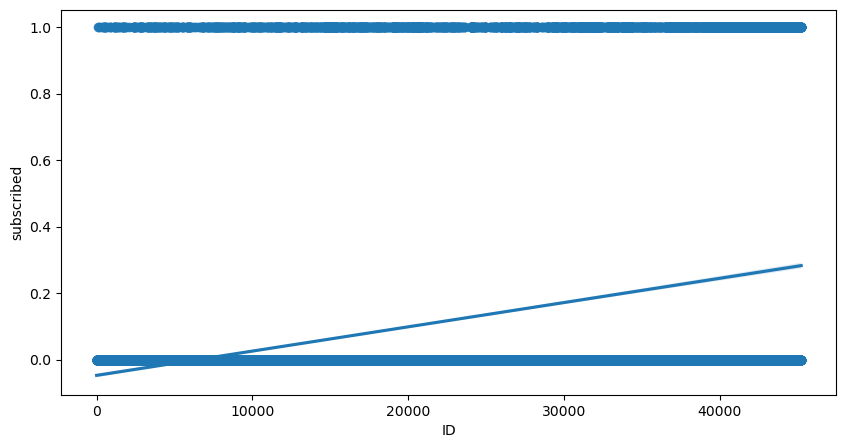

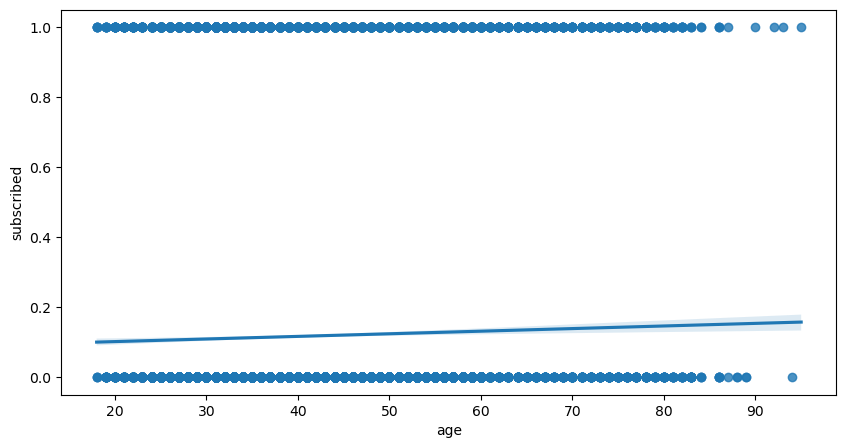

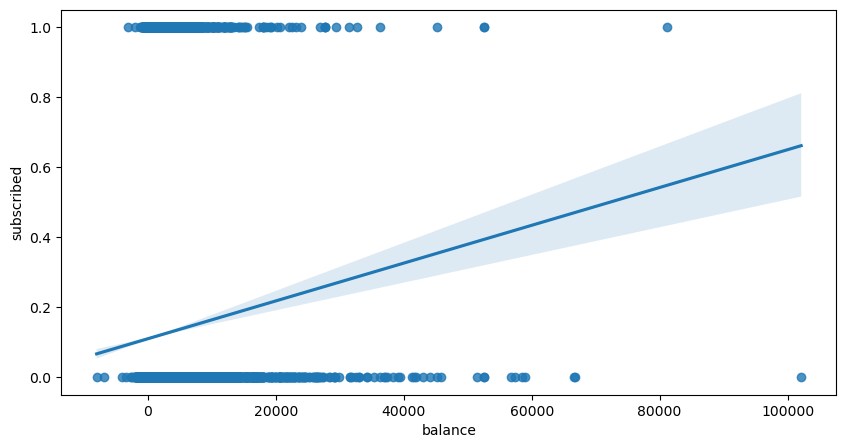

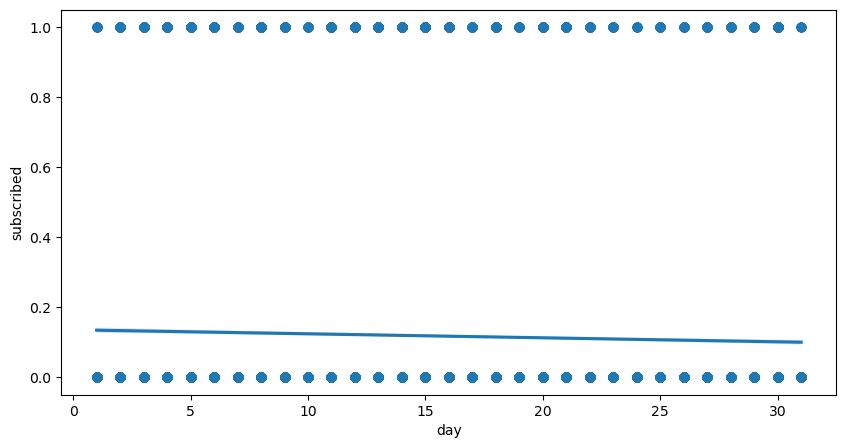

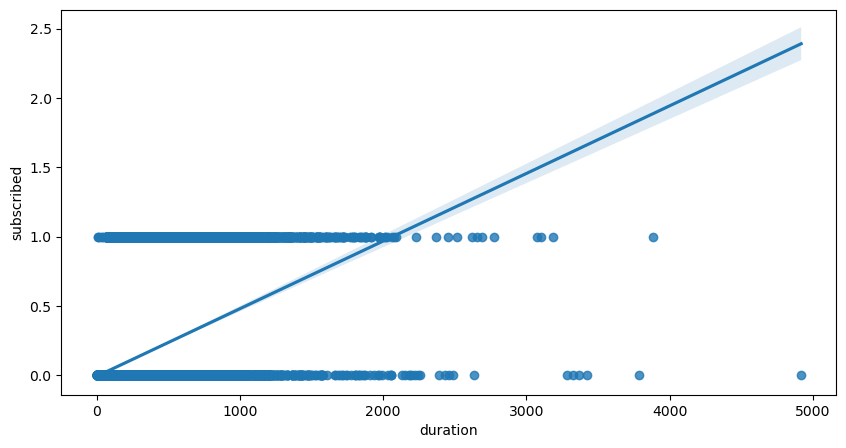

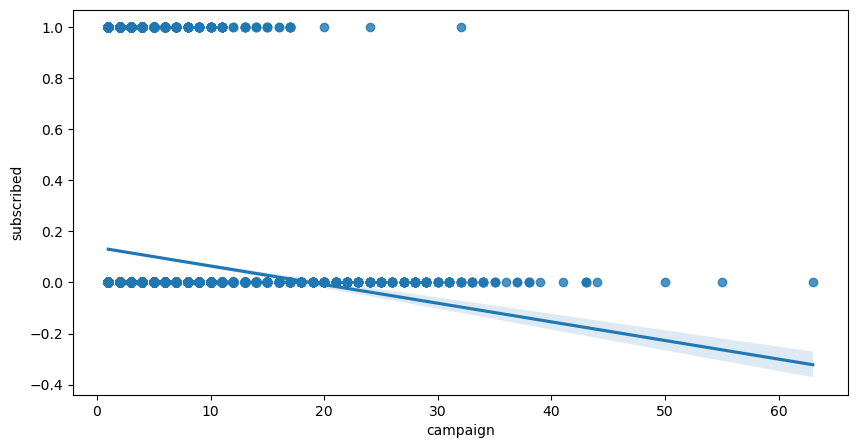

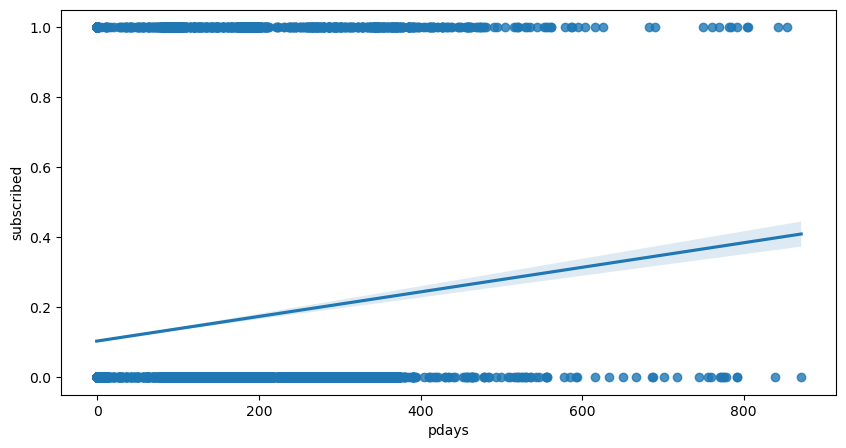

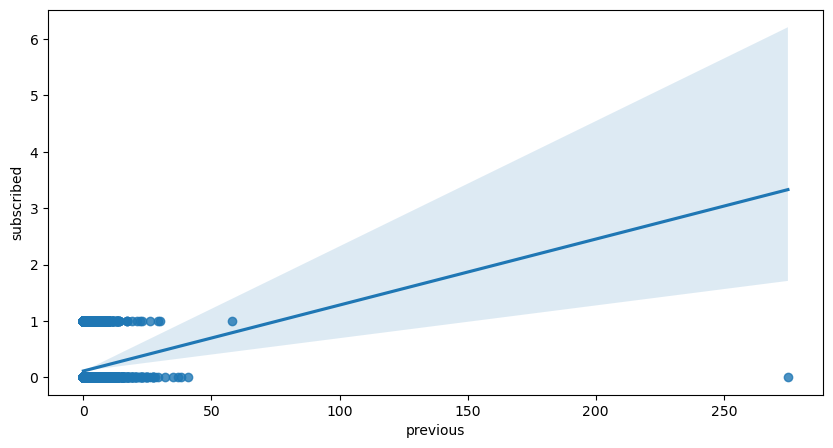

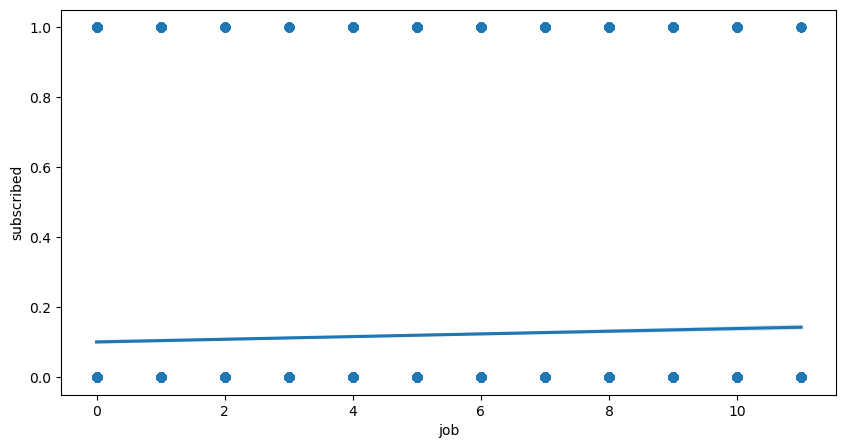

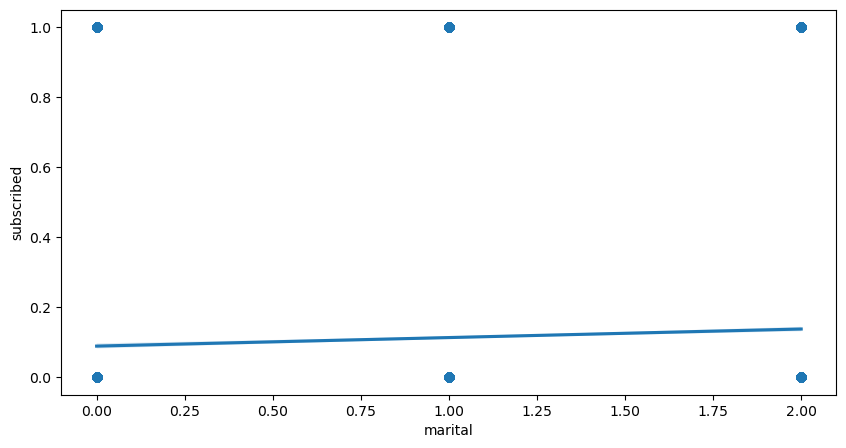

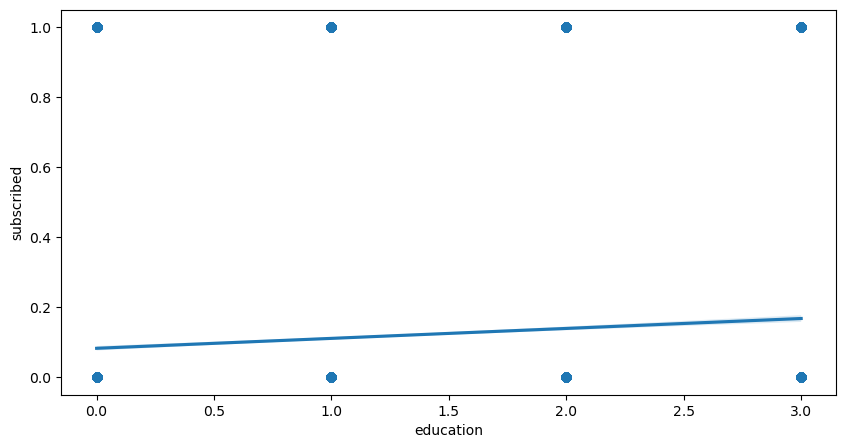

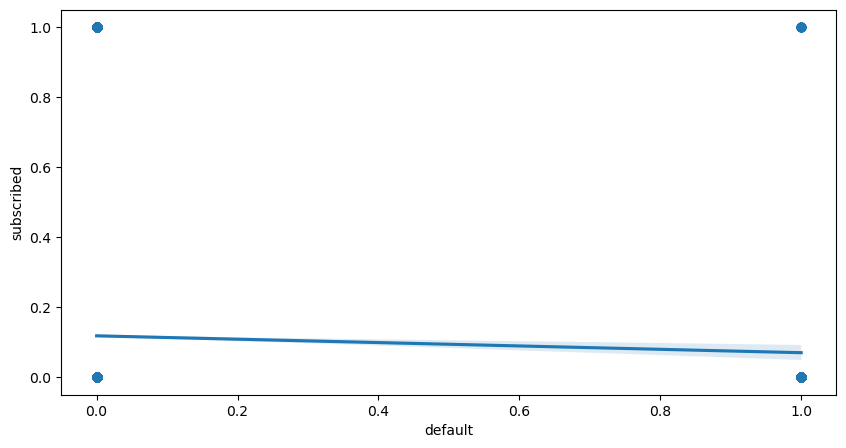

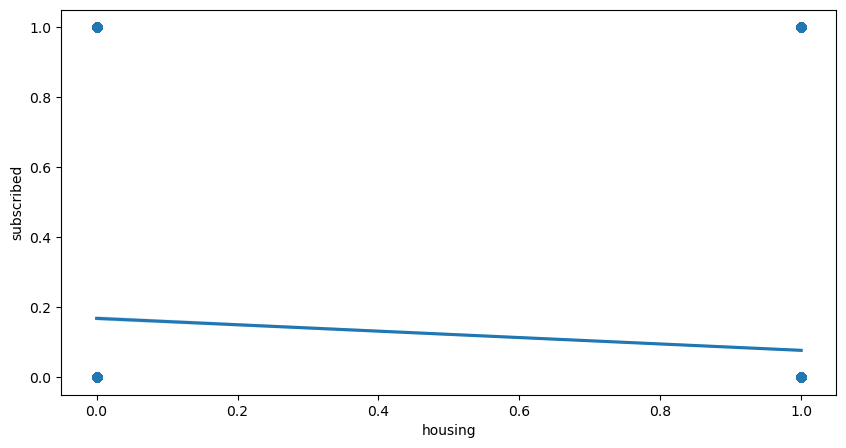

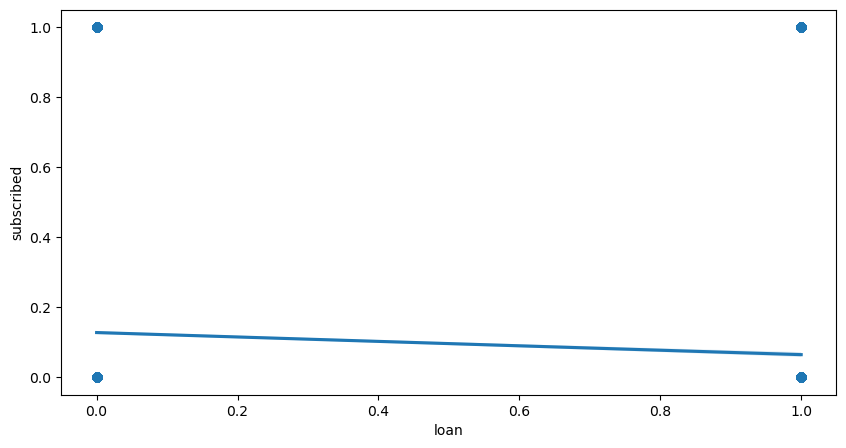

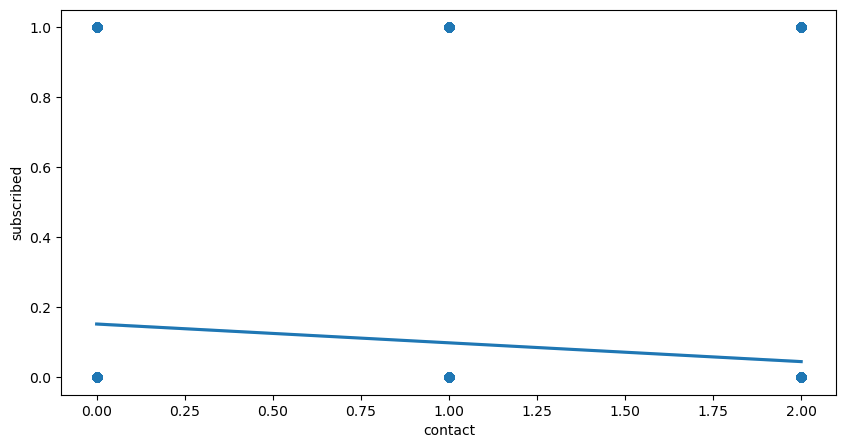

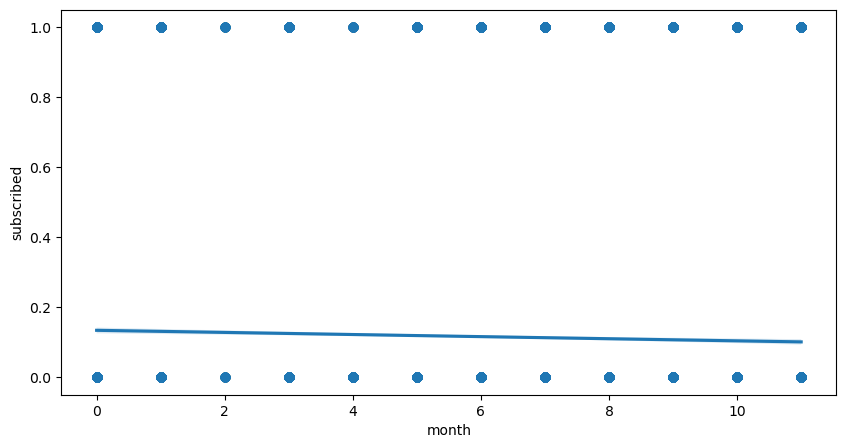

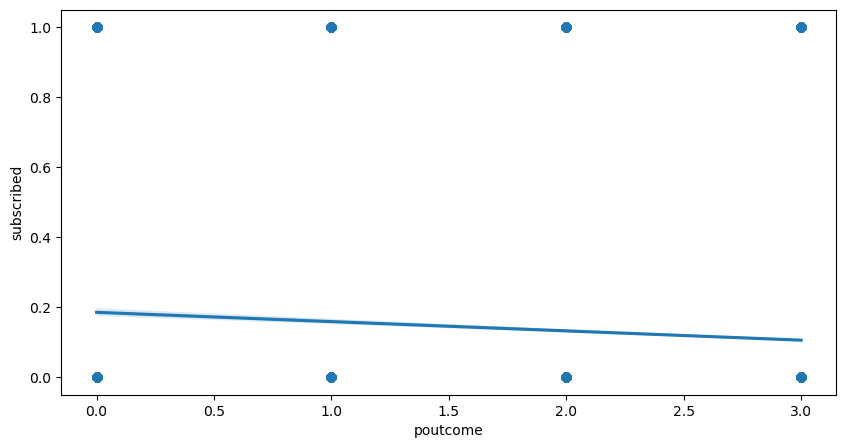

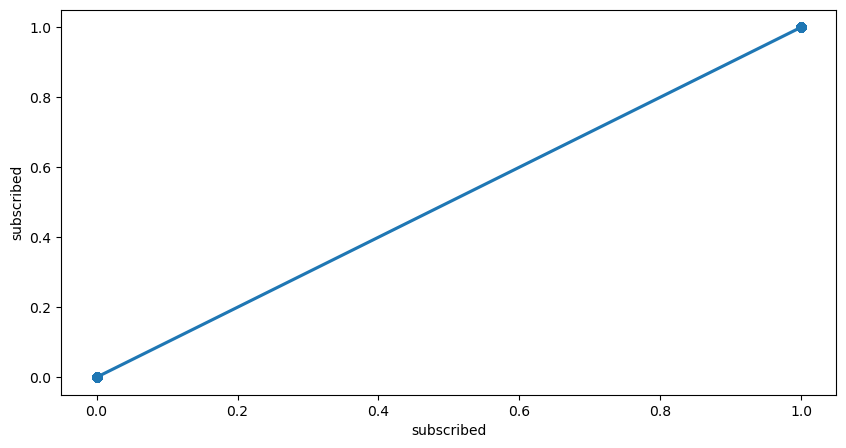

In [43]:
# Creating a loop to visualize a trend comparision with 'subscribed' of the other features in the dataset
for a in x:
    plt.figure(figsize=(10,5))
    sns.regplot(x=a,y='subscribed',data=x)

In [44]:
x.isna().sum()

ID            0
age           0
balance       0
day           0
duration      0
campaign      0
pdays         0
previous      0
job           0
marital       0
education     0
default       0
housing       0
loan          0
contact       0
month         0
poutcome      0
subscribed    0
dtype: int64

In [45]:
cor=con.corr()
cor

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


In [46]:
corr=x.corr()
corr

,ID,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.061805,0.086454,0.096480,-0.051521,-0.180047,-0.086140,-0.723830,-0.165274,-0.443429,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,-0.020765,-0.406024,-0.102356,-0.016117,-0.183775,-0.012657,0.026733,-0.038368,0.006466,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.020638,0.003487,0.065176,-0.069422,-0.067466,-0.083631,-0.024083,0.023056,-0.019629,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,0.020951,-0.007686,0.017902,0.009996,-0.025666,0.014769,-0.027046,-0.000604,0.077586,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.002694,0.011544,0.003842,-0.010849,0.003021,-0.012781,-0.016503,0.005943,0.009771,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,0.001469,-0.009394,0.006142,0.018538,-0.021076,0.009340,0.022666,-0.105428,0.100720,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,-0.022552,0.019741,-0.001566,-0.029622,0.118790,-0.020078,-0.245076,0.027576,-0.857716,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,-0.003032,0.012717,0.015280,-0.015877,0.034231,-0.009258,-0.141098,0.020107,-0.463034,0.088081
job,0.061805,-0.020765,0.020638,0.020951,0.002694,0.001469,-0.022552,-0.003032,1.000000,0.066124,0.170347,-0.005217,-0.125347,-0.039049,-0.078253,-0.089384,0.007101,0.038921
marital,0.086454,-0.406024,0.003487,-0.007686,0.011544,-0.009394,0.019741,0.012717,0.066124,1.000000,0.107547,-0.009591,-0.017846,-0.041654,-0.040180,-0.003834,-0.019770,0.046043


In [47]:
# df=pd.concat([cor,x],axis=1)
# df

<AxesSubplot: >

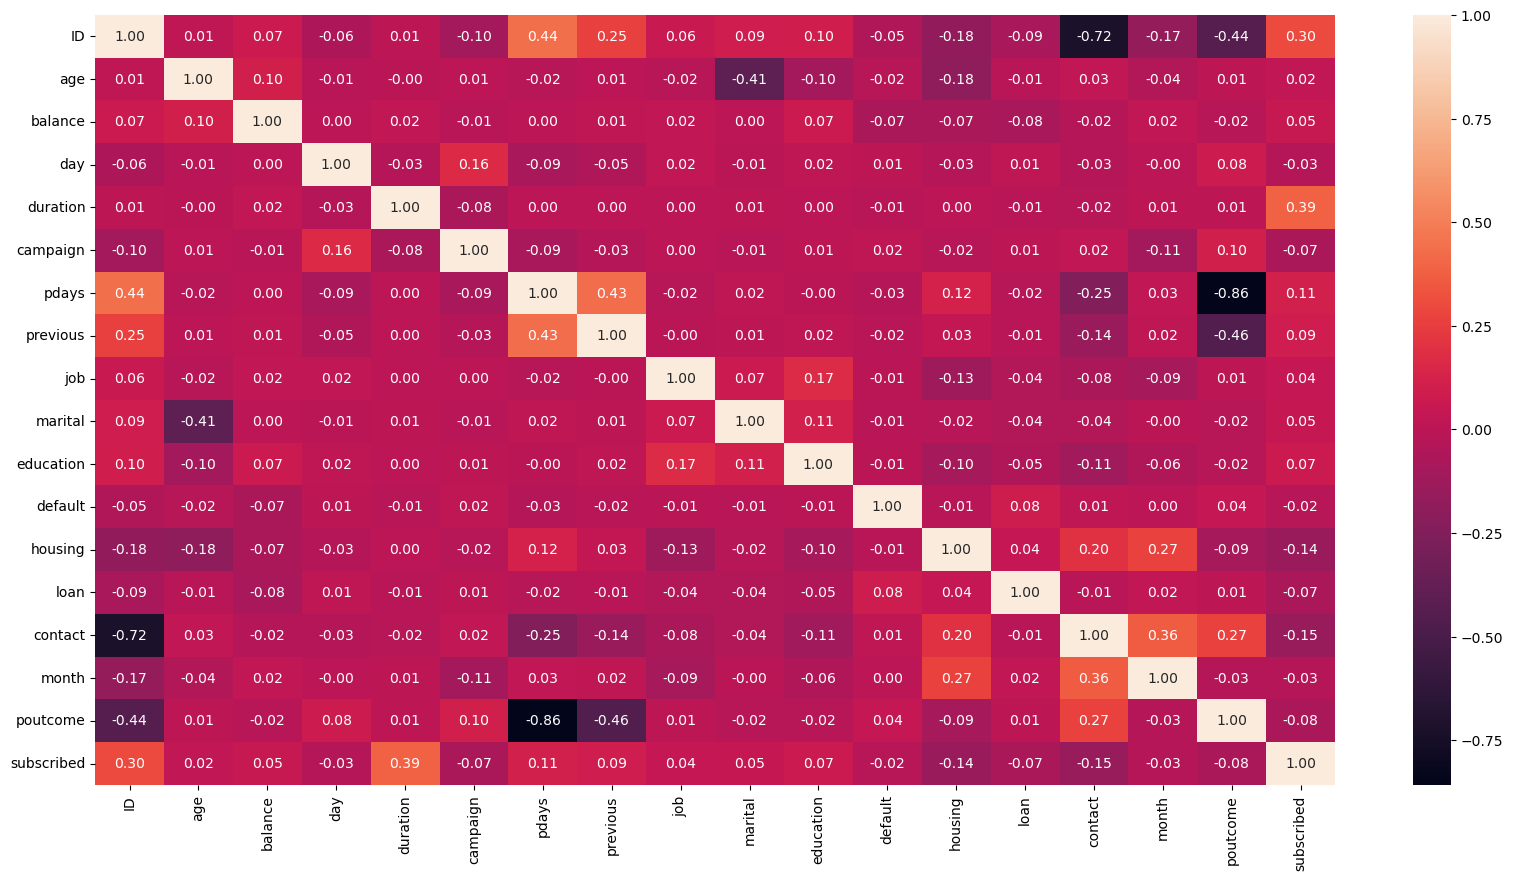

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')

In [49]:
corr["subscribed"].sort_values()

contact      -0.150051
housing      -0.141092
poutcome     -0.080895
loan         -0.072266
campaign     -0.070607
day          -0.029600
month        -0.028088
default      -0.020168
age           0.024538
job           0.038921
marital       0.046043
balance       0.050807
education     0.066051
previous      0.088081
pdays         0.108290
ID            0.296663
duration      0.389838
subscribed    1.000000
Name: subscribed, dtype: float64

In [50]:
X=x.iloc[:,1:-1]
X

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,56,1933,19,44,2,-1,0,0,1,3,0,0,0,1,9,3
1,31,3,20,91,2,-1,0,11,1,1,0,0,0,0,5,3
2,27,891,18,240,1,-1,0,7,1,1,0,1,0,0,5,3
3,57,3287,22,867,1,84,3,4,0,2,0,0,0,0,6,2
4,31,119,4,380,1,-1,0,9,1,1,0,1,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,0,12,116,2,-1,0,4,2,2,0,1,0,0,8,3
31643,53,380,5,438,2,-1,0,4,0,2,0,0,1,0,6,3
31644,32,312,7,37,3,-1,0,4,2,2,0,0,0,0,1,3
31645,57,225,15,22,7,337,12,9,1,1,0,1,0,1,8,0


In [51]:
Y=x.iloc[:,-1]
Y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

In [52]:
# # detecting outliers
# from scipy.stats import zscore
# z=np.abs(zscore(con))
# threshold=3
# con=z[(z<3).all(axis=1)]
# con.shape

In [53]:
# loss= (31647-28124)/31647*100
# print(loss)

In [54]:
# from scipy.stats import zscore
# z=np.abs(zscore(con[[ 'age', 'balance', 'duration', 'campaign', 'previous']]))
# threshold=3
# np.where(z>3)
# new_df=con[(z<3).all(axis=1)]
# new_df

In [55]:
# new_df

In [56]:
# loss= (31647-29243)/31647*100
# print(loss)

In [57]:
# from sklearn.preprocessing import PowerTransformer
# transform = PowerTransformer(method="yeo-johnson")
# skewed= transform.fit_transform(new_df['age'])
# skewed

In [58]:
# new_df["balance"]=np.sqrt(new_df["balance"])
# new_df["balance"]

In [59]:
# new_df["balance"].skew()

In [60]:
# new_df["duration"]=np.sqrt(new_df["duration"])
# new_df["duration"]

In [61]:
# new_df["campaign"]=np.log(new_df["campaign"])
# new_df["campaign"]

In [62]:
from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer(method='yeo-johnson')
new= transform.fit_transform(con)
new

array([[ 0.35095073,  1.34138189,  0.34006165, ...,  0.135025  ,
        -0.46969565, -0.46967334],
       [ 1.27658532, -0.9663778 , -0.43250222, ...,  0.135025  ,
        -0.46969565, -0.46967334],
       [-0.44573069, -1.53815285, -0.03147532, ..., -1.1092387 ,
        -0.46969565, -0.46967334],
       ...,
       [-0.10616057, -0.83671116, -0.26874651, ...,  0.73858224,
        -0.46969565, -0.46967334],
       [ 1.15412705,  1.40695494, -0.30899594, ...,  1.60920054,
         2.15084394,  2.18608335],
       [-0.54043023,  1.27441963, -0.31905631, ...,  0.135025  ,
        -0.46969565, -0.46967334]])

In [63]:
x=pd.DataFrame(new,columns=con.columns)
x.skew().sort_values(ascending=True)

ID         -0.290929
day        -0.159858
age         0.008940
duration    0.017331
campaign    0.230683
balance     0.821075
pdays       1.660825
previous    1.661485
dtype: float64

In [64]:
x

,ID,age,balance,day,duration,campaign,pdays,previous
0,0.350951,1.341382,0.340062,0.439464,-1.443825,0.135025,-0.469696,-0.469673
1,1.276585,-0.966378,-0.432502,0.548516,-0.751296,0.135025,-0.469696,-0.469673
2,-0.445731,-1.538153,-0.031475,0.328737,0.290005,-1.109239,-0.469696,-0.469673
3,1.477866,1.406955,0.776856,0.762001,1.895948,-1.109239,2.105039,2.177812
4,0.601861,-0.966378,-0.361739,-1.515370,0.833299,-1.109239,-0.469696,-0.469673
...,...,...,...,...,...,...,...,...
31642,1.026451,-1.240871,-0.435463,-0.378514,-0.503544,0.135025,-0.469696,-0.469673
31643,1.252604,1.136104,-0.238544,-1.352488,1.008101,0.135025,-0.469696,-0.469673
31644,-0.106161,-0.836711,-0.268747,-1.049546,-1.598288,0.738582,-0.469696,-0.469673
31645,1.154127,1.406955,-0.308996,-0.014725,-2.037314,1.609201,2.150844,2.186083


In [65]:
x=pd.concat([x,cate],axis=1,join='inner')
x

,ID,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,0.350951,1.341382,0.340062,0.439464,-1.443825,0.135025,-0.469696,-0.469673,0,1,3,0,0,0,1,9,3,0
1,1.276585,-0.966378,-0.432502,0.548516,-0.751296,0.135025,-0.469696,-0.469673,11,1,1,0,0,0,0,5,3,0
2,-0.445731,-1.538153,-0.031475,0.328737,0.290005,-1.109239,-0.469696,-0.469673,7,1,1,0,1,0,0,5,3,0
3,1.477866,1.406955,0.776856,0.762001,1.895948,-1.109239,2.105039,2.177812,4,0,2,0,0,0,0,6,2,1
4,0.601861,-0.966378,-0.361739,-1.515370,0.833299,-1.109239,-0.469696,-0.469673,9,1,1,0,1,0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.026451,-1.240871,-0.435463,-0.378514,-0.503544,0.135025,-0.469696,-0.469673,4,2,2,0,1,0,0,8,3,0
31643,1.252604,1.136104,-0.238544,-1.352488,1.008101,0.135025,-0.469696,-0.469673,4,0,2,0,0,1,0,6,3,1
31644,-0.106161,-0.836711,-0.268747,-1.049546,-1.598288,0.738582,-0.469696,-0.469673,4,2,2,0,0,0,0,1,3,0
31645,1.154127,1.406955,-0.308996,-0.014725,-2.037314,1.609201,2.150844,2.186083,9,1,1,0,1,0,1,8,0,0


In [66]:
# new_df["pdays"]=np.sqrt(new_df["pdays"])
# new_df["pdays"]

In [67]:
# new_df["previous"]=np.sqrt(new_df["previous"])
# new_df["previous"]

In [68]:
# new_df.skew()

In [69]:
# pd.DataFrame(new_df,columns=new_df.columns).skew().sort_values(ascending=True)

In [70]:
X=x.iloc[:,1:-1]
X

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,1.341382,0.340062,0.439464,-1.443825,0.135025,-0.469696,-0.469673,0,1,3,0,0,0,1,9,3
1,-0.966378,-0.432502,0.548516,-0.751296,0.135025,-0.469696,-0.469673,11,1,1,0,0,0,0,5,3
2,-1.538153,-0.031475,0.328737,0.290005,-1.109239,-0.469696,-0.469673,7,1,1,0,1,0,0,5,3
3,1.406955,0.776856,0.762001,1.895948,-1.109239,2.105039,2.177812,4,0,2,0,0,0,0,6,2
4,-0.966378,-0.361739,-1.515370,0.833299,-1.109239,-0.469696,-0.469673,9,1,1,0,1,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.240871,-0.435463,-0.378514,-0.503544,0.135025,-0.469696,-0.469673,4,2,2,0,1,0,0,8,3
31643,1.136104,-0.238544,-1.352488,1.008101,0.135025,-0.469696,-0.469673,4,0,2,0,0,1,0,6,3
31644,-0.836711,-0.268747,-1.049546,-1.598288,0.738582,-0.469696,-0.469673,4,2,2,0,0,0,0,1,3
31645,1.406955,-0.308996,-0.014725,-2.037314,1.609201,2.150844,2.186083,9,1,1,0,1,0,1,8,0


In [71]:
Y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

In [72]:
X.skew()

age          0.008940
balance      0.821075
day         -0.159858
duration     0.017331
campaign     0.230683
pdays        1.660825
previous     1.661485
job          0.264817
marital     -0.100071
education    0.199441
default      7.149903
housing     -0.223918
loan         1.833474
contact      0.758602
month       -0.486498
poutcome    -1.996421
dtype: float64

In [73]:
# Vif=pd.DataFrame()
# Vif['Vif']=[variance_inflation_factor(new_df,i) for i in range(x.shape[1])]
# Vif['features']=X.columns
# Vif

In [74]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 1.34138189,  0.34006165,  0.4394636 , ...,  0.3950762 ,
         1.15400746,  0.44177692],
       [-0.9663778 , -0.43250222,  0.54851614, ..., -0.71669479,
        -0.17746194,  0.44177692],
       [-1.53815285, -0.03147532,  0.32873695, ..., -0.71669479,
        -0.17746194,  0.44177692],
       ...,
       [-0.83671116, -0.26874651, -1.04954569, ..., -0.71669479,
        -1.50893133,  0.44177692],
       [ 1.40695494, -0.30899594, -0.01472536, ...,  0.3950762 ,
         0.82114011, -2.61304774],
       [ 1.27441963, -0.31905631, -0.50530664, ..., -0.71669479,
        -0.17746194,  0.44177692]])

In [75]:
import sklearn
print(sklearn.__version__)
import numpy as np
print(np.__version__)
!pip install imblearn
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy =smt.fit_resample(x_scaled,Y)

1.0.2
1.21.5


In [76]:
resamp=pd.DataFrame(trainy)
resamp.value_counts()


subscribed
0             27932
1             27932
dtype: int64

<AxesSubplot: xlabel='subscribed', ylabel='count'>

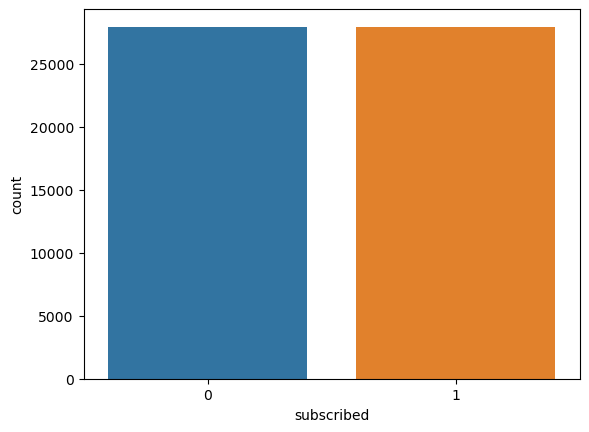

In [77]:
sns.countplot(x="subscribed", data=resamp)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.20,random_state=15)

In [79]:
print(x_train.shape)
print(y_train.shape)

(44691, 16)
(44691,)


In [80]:
lg = LogisticRegression(random_state=15)
lg.fit(x_train,y_train)

LogisticRegression(random_state=15)

In [81]:
pred=lg.predict(x_test)
pred

array([1, 1, 1, ..., 0, 0, 1])

In [82]:
lg.score(x_train,y_train)

0.8211049204537827

In [83]:
lg.score(x_test, y_test)

0.8233240848473999

In [84]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[4528 1023]
 [ 951 4671]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5551
           1       0.82      0.83      0.83      5622

    accuracy                           0.82     11173
   macro avg       0.82      0.82      0.82     11173
weighted avg       0.82      0.82      0.82     11173

0.8233240848473999


In [85]:
cross_val= cross_val_score(lg,x_train,y_train,cv=5)
print(cross_val)
print(cross_val.mean)
print(cross_val.std())

[0.82223962 0.8236742  0.82535243 0.82188409 0.81248601]
<built-in method mean of numpy.ndarray object at 0x00000170DA70BB70>
0.004490439002504413


In [86]:
mnb=GaussianNB()
mnb.fit(x_train,y_train)

GaussianNB()

In [87]:
pred=mnb.predict(x_test)
pred

array([1, 1, 0, ..., 0, 1, 1])

In [88]:
mnb.score(x_train,y_train)

0.7562372737240161

In [89]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[4037 1514]
 [1184 4438]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5551
           1       0.75      0.79      0.77      5622

    accuracy                           0.76     11173
   macro avg       0.76      0.76      0.76     11173
weighted avg       0.76      0.76      0.76     11173

0.7585250156627584


In [90]:
dtc = DecisionTreeClassifier(random_state=15)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=15)

In [91]:
pred=dtc.predict(x_test)
pred

array([1, 1, 1, ..., 0, 0, 1])

In [92]:
dtc.score(x_train,y_train)

1.0

In [93]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[4976  575]
 [ 512 5110]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5551
           1       0.90      0.91      0.90      5622

    accuracy                           0.90     11173
   macro avg       0.90      0.90      0.90     11173
weighted avg       0.90      0.90      0.90     11173

0.9027118947462633


In [94]:
print("MAE",mean_squared_error(y_test,pred))

MAE 0.09728810525373668


In [95]:
print("MAE",mean_absolute_error(y_test,pred))

MAE 0.09728810525373668


In [96]:
 # Regularization with grid search CV

In [97]:
#create and fit a ridge regression model testing each alpha
parameters={'alpha':[0.1,0.01,0.001,0.0001,1,0],'random_state':list(range(0,10))}
model=Ridge()
grid=GridSearchCV(model,parameters)
grid.fit(trainx,trainy)
print(grid.best_params_)

{'alpha': 1, 'random_state': 0}


In [98]:
model=Ridge(alpha= 0.0001, random_state=0)
model.fit(trainx,trainy)

Ridge(alpha=0.0001, random_state=0)

In [99]:
prediction_Rid=model.predict(x_test)
prediction_Rid

array([0.71287711, 0.93066626, 0.80804829, ..., 0.25474333, 0.36417824,
       1.12155184])

In [100]:
score_rid=model.score(trainx,trainy)
score_rid

0.4436019228824115

In [101]:
mod=Lasso()
parameter={'alpha':[0.1,0.01,0.001,0.0001,1,0],'random_state':list(range(0,10))}
grid=GridSearchCV(mod,parameter)
grid.fit(trainx,trainy)
print(grid.best_params_)

{'alpha': 0, 'random_state': 0}


In [102]:
mod=Lasso(alpha= 0, random_state=0)
mod.fit(trainx,trainy)

Lasso(alpha=0, random_state=0)

In [103]:
prediction_lasso=mod.predict(x_test)
prediction_lasso

array([0.71257433, 0.93413843, 0.80802114, ..., 0.25482292, 0.36430235,
       1.1214822 ])

In [104]:
score_lasso=model.score(trainx,trainy)
score_lasso

0.4436019228824115

In [105]:
print(grid.best_params_)

{'alpha': 0, 'random_state': 0}


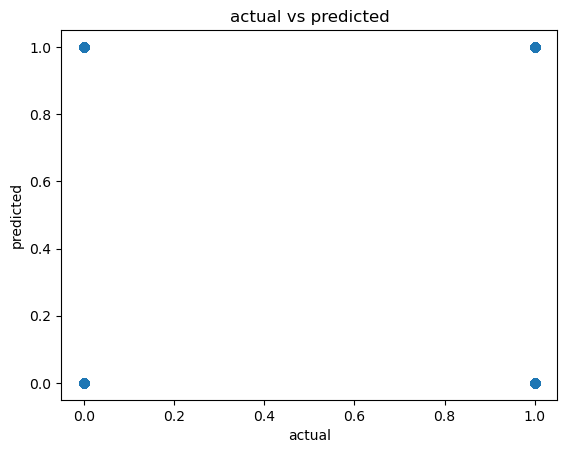

In [114]:
#prediction through graph
plt.scatter(y_test,pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
plt.show()

In [115]:
#for saving the file
import joblib
joblib.dump(lg,"train.csv.obj")
lr_joblib=joblib.load("train.csv.obj")
lr_joblib

LogisticRegression(random_state=15)

# Test.csv

In [116]:
df=pd.read_csv(r"C:\Users\udayr\termdeposit_test.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [117]:
df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [119]:
df.duplicated().sum()

0

In [120]:
df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [121]:
df.isna()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13560,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13561,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [122]:
df.isin([" "]).sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [123]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [124]:
cat=df.select_dtypes("object")
cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,services,married,secondary,no,yes,no,cellular,may,unknown
1,retired,divorced,primary,no,no,no,telephone,jul,unknown
2,self-employed,single,tertiary,no,yes,no,unknown,may,unknown
3,services,single,primary,no,yes,no,telephone,may,unknown
4,blue-collar,divorced,secondary,no,no,yes,unknown,jul,unknown
...,...,...,...,...,...,...,...,...,...
13559,management,married,tertiary,no,no,no,cellular,aug,unknown
13560,blue-collar,married,primary,no,yes,no,unknown,jun,unknown
13561,retired,married,primary,no,yes,no,cellular,jan,unknown
13562,admin.,single,secondary,no,no,no,cellular,nov,success


In [125]:
con=df.select_dtypes("int")
con

,ID,age,balance,day,duration,campaign,pdays,previous
0,38441,32,118,15,20,6,-1,0
1,40403,78,2787,1,372,1,-1,0
2,3709,31,144,16,676,1,-1,0
3,37422,57,3777,13,65,2,-1,0
4,12527,45,-705,3,111,1,-1,0
...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0
13560,11743,54,2281,20,158,1,-1,0
13561,28292,35,285,29,136,1,-1,0
13562,45163,29,464,9,208,2,91,3


In [126]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


Text(0.5, 1.0, 'Job-Age')

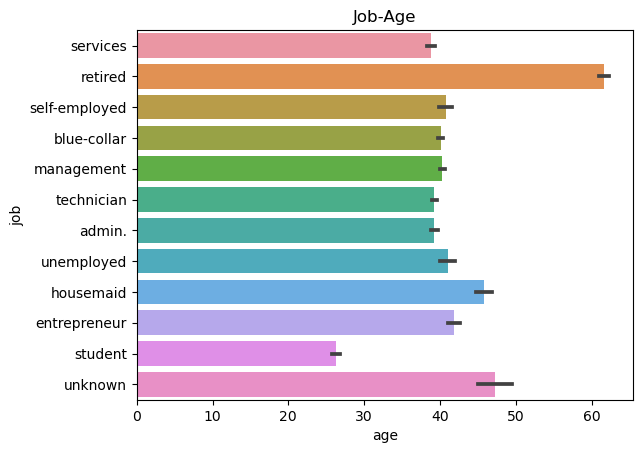

In [127]:
sns.barplot(x=df["age"],y=df["job"])
plt.title("Job-Age")

Text(0.5, 1.0, 'duration-ID')

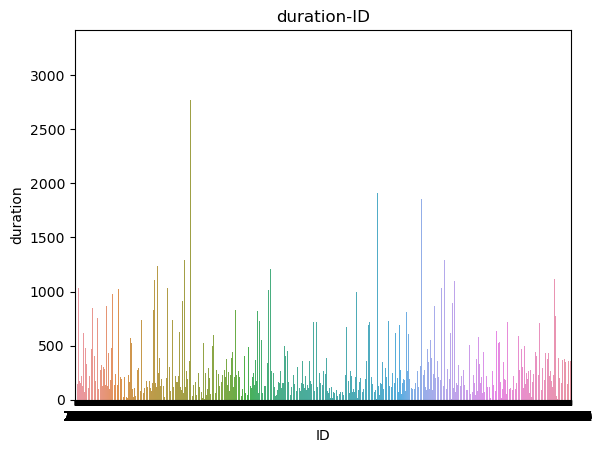

In [128]:
sns.barplot(x=df["ID"],y=df["duration"])
plt.title("duration-ID")

<AxesSubplot: xlabel='age', ylabel='balance'>

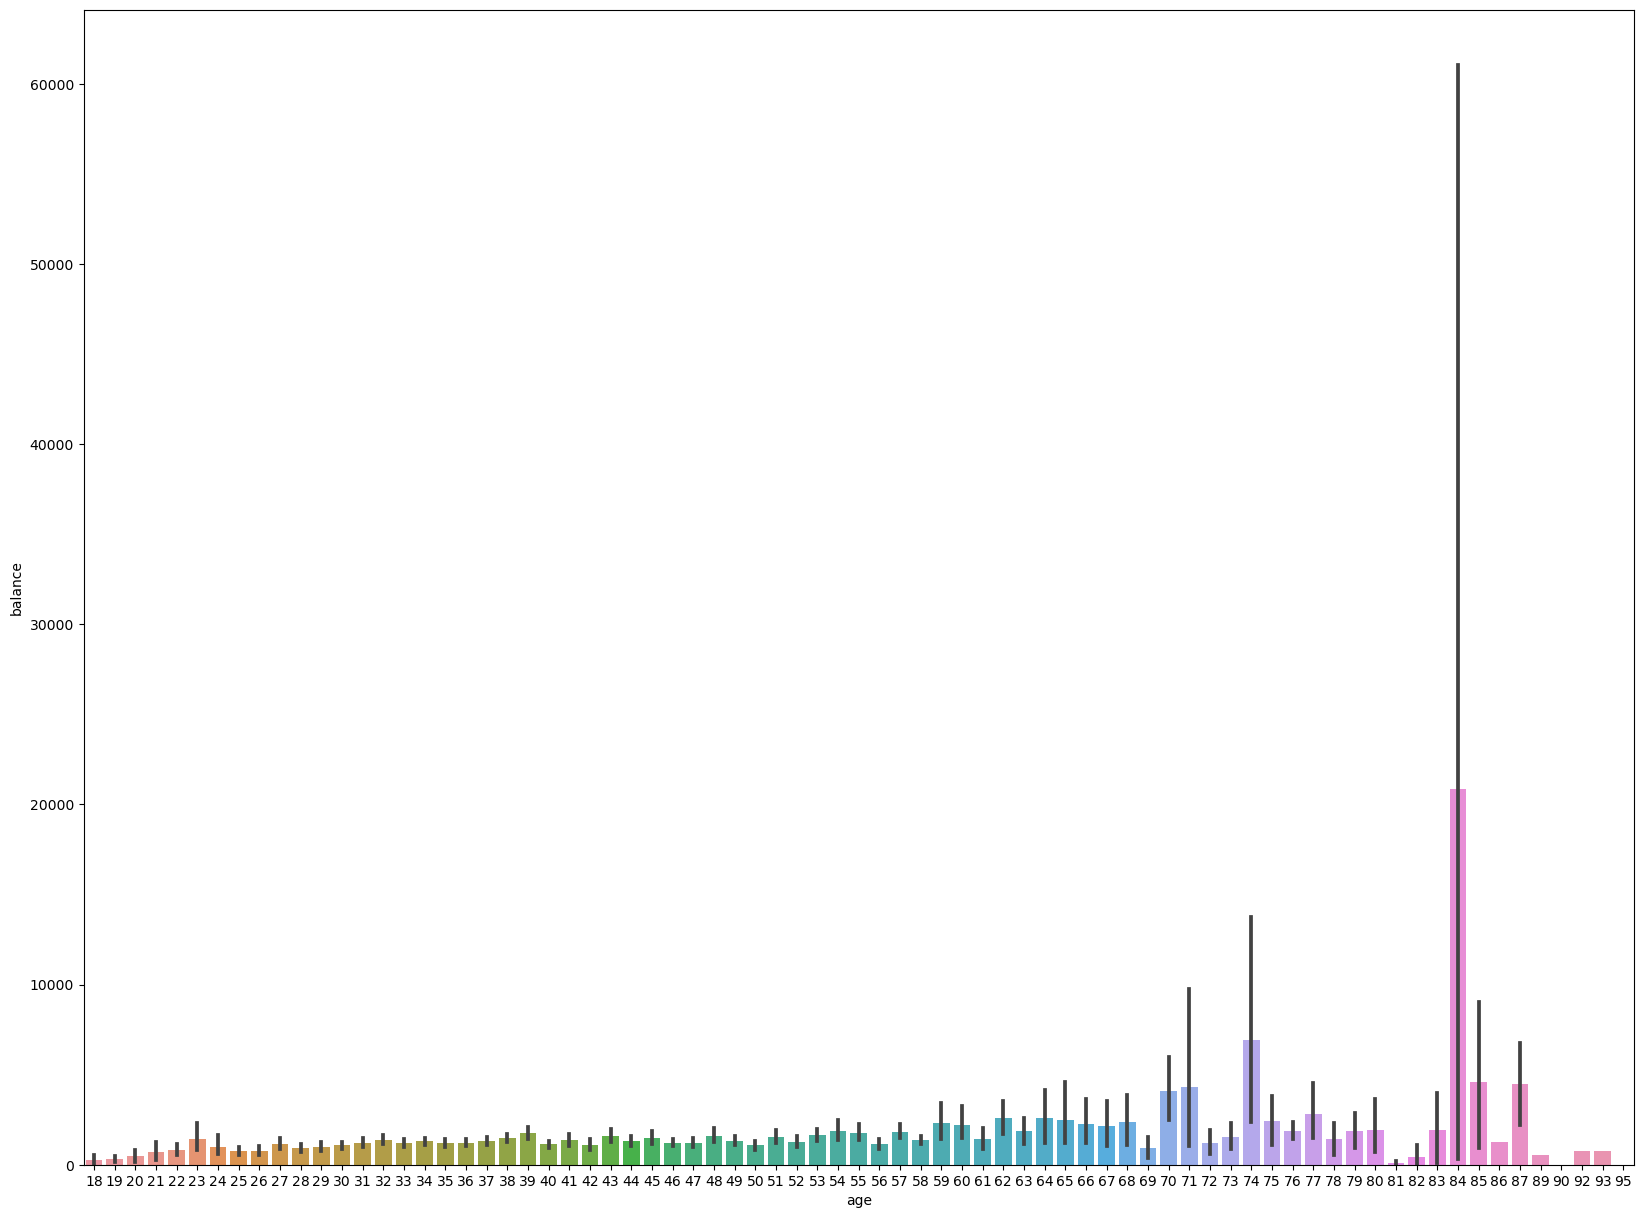

In [129]:
plt.figure(figsize=(20,15))
sns.barplot(x ='age', y='balance',data = df)

<AxesSubplot: xlabel='age', ylabel='balance'>

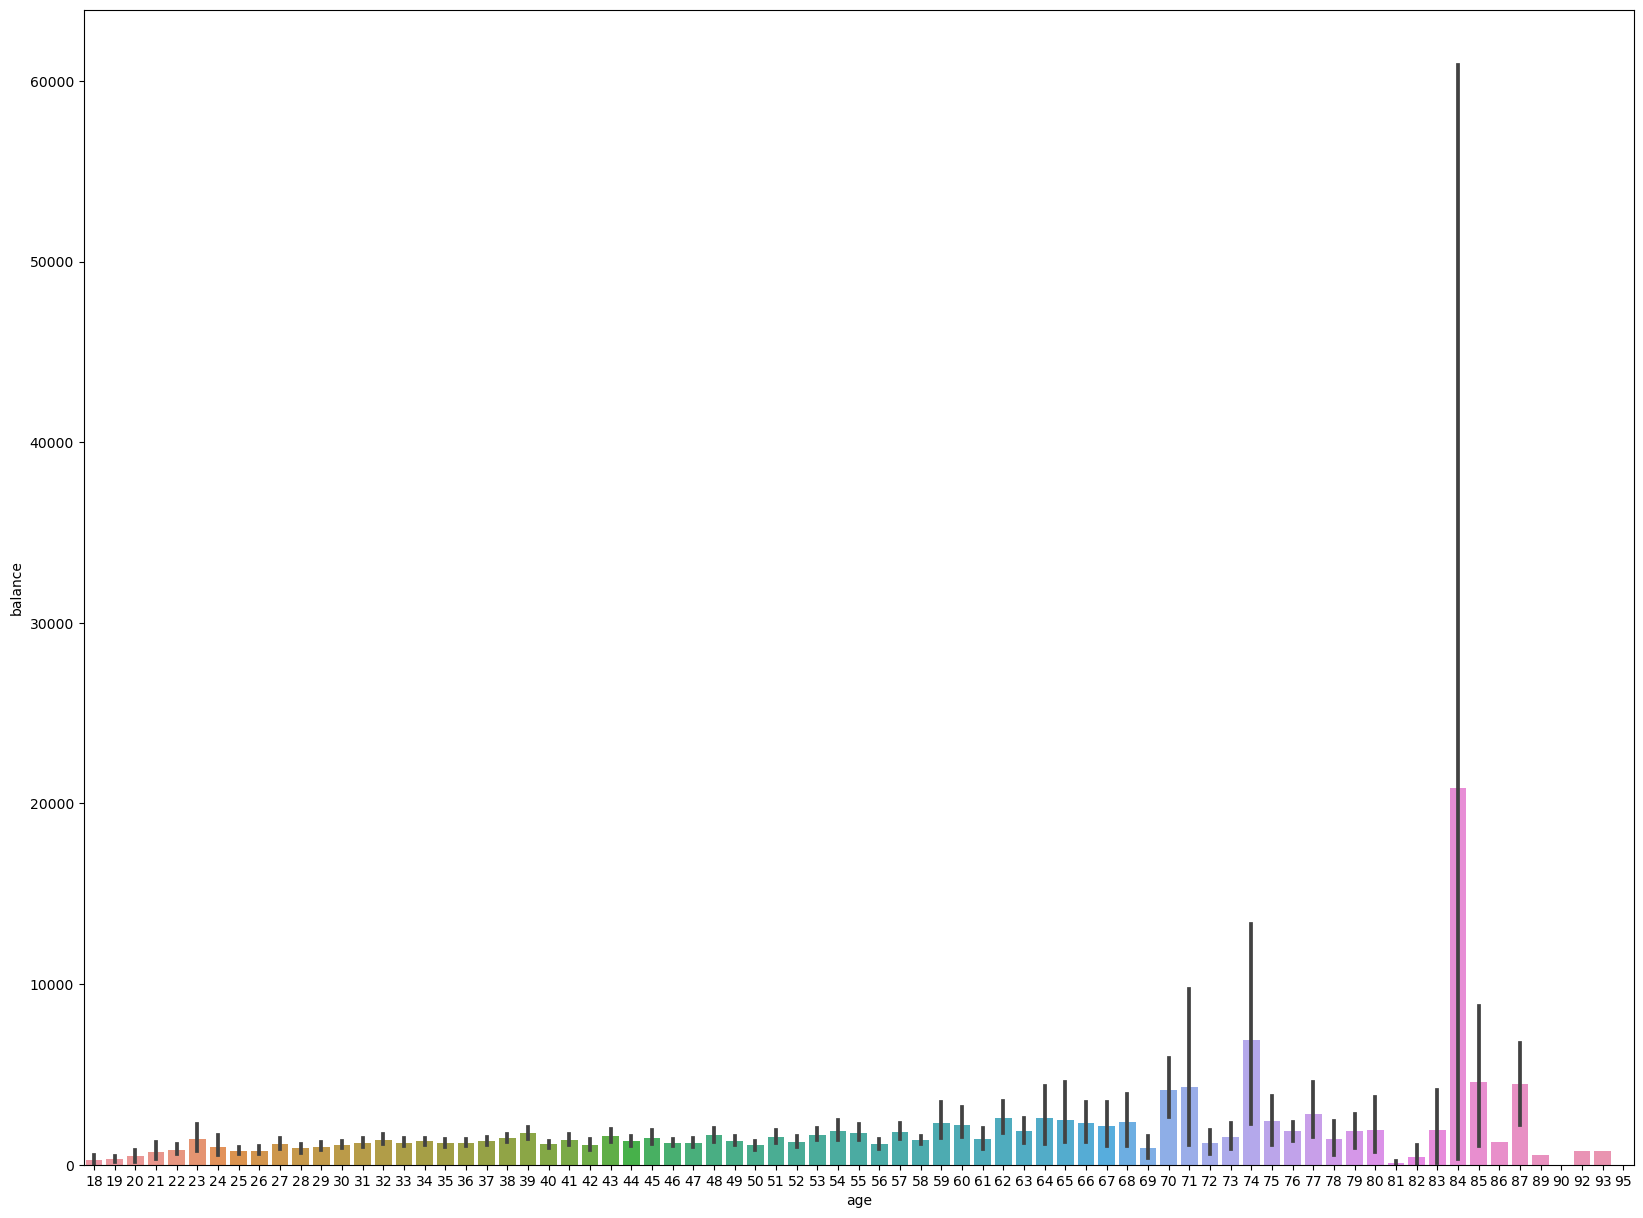

In [130]:
plt.figure(figsize=(20,15))
sns.barplot(x ='age', y='balance',data = df)

In [131]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

<AxesSubplot: xlabel='education', ylabel='count'>

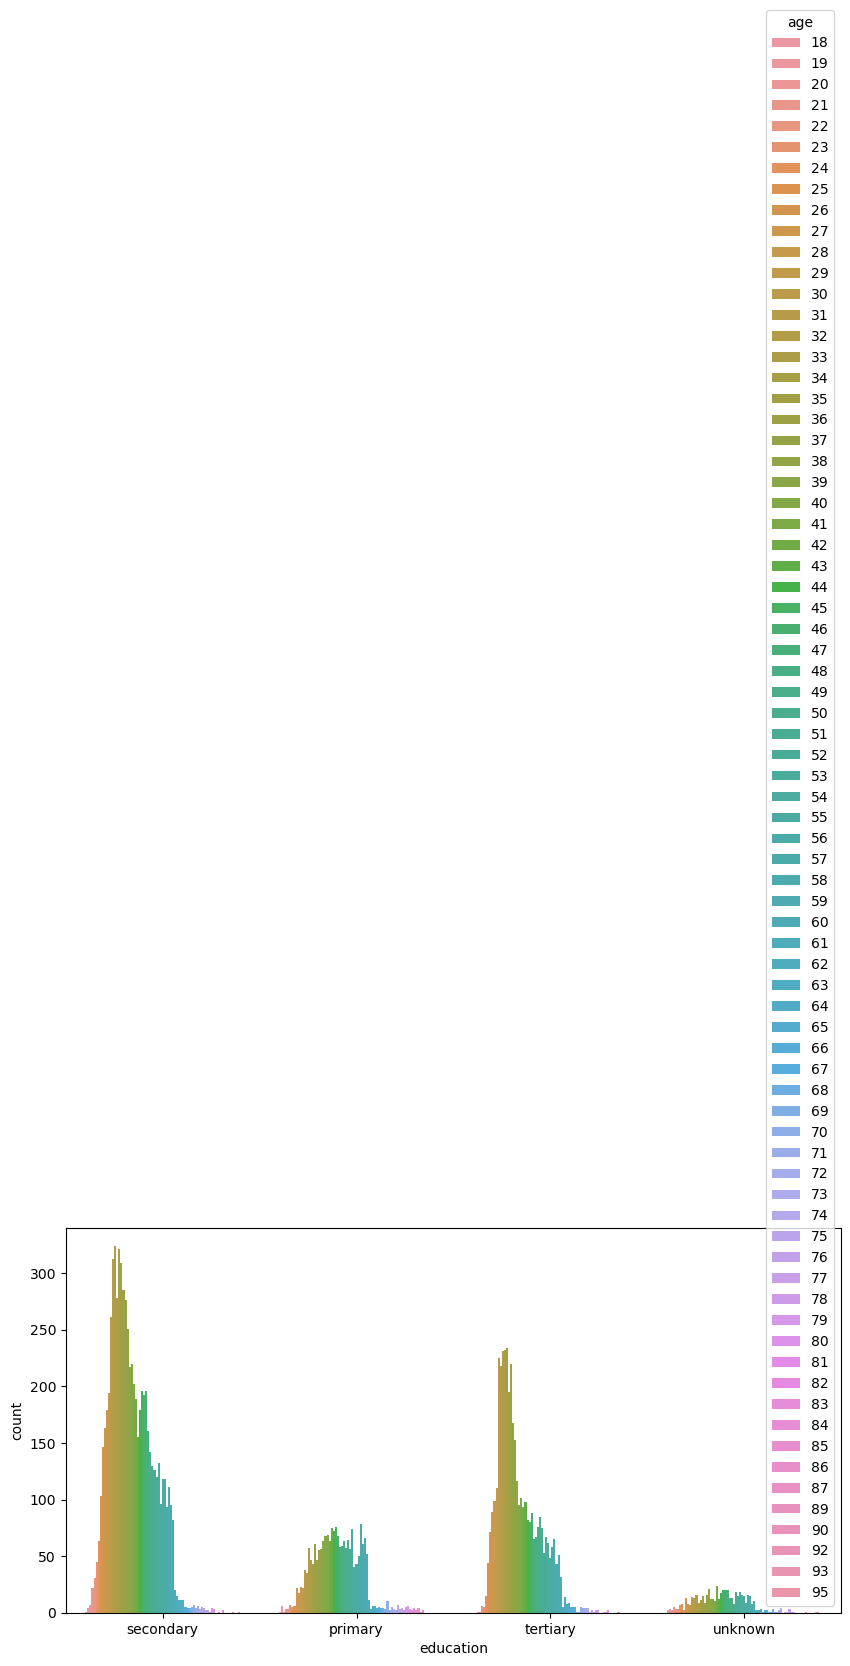

In [132]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['education'],hue=df['age'])

<AxesSubplot: xlabel='loan', ylabel='count'>

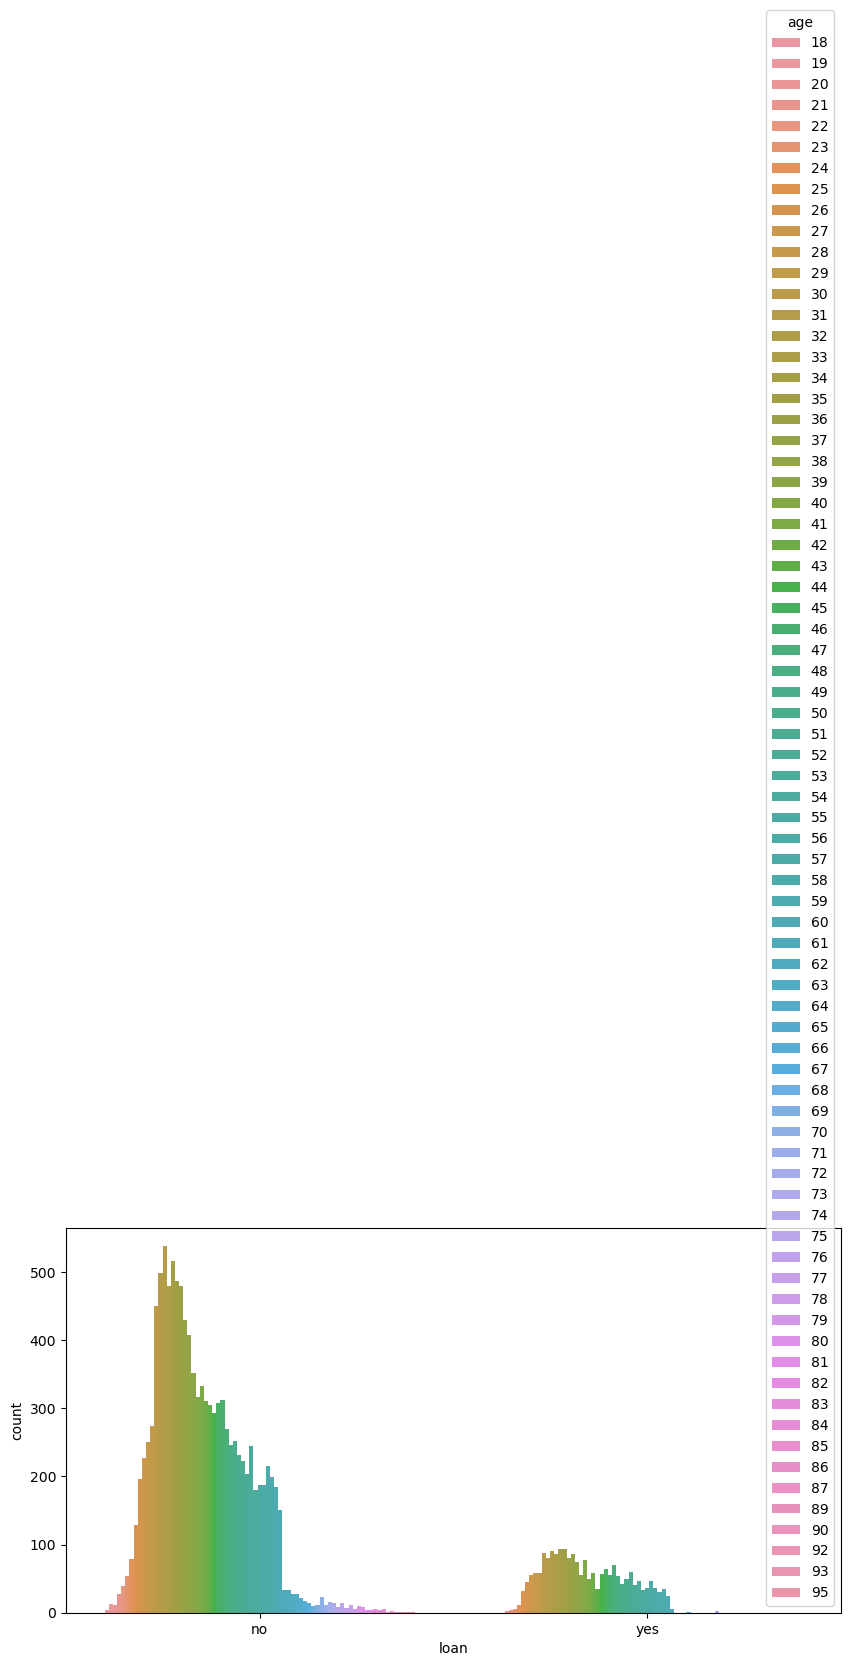

In [133]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['loan'],hue=df['age'])

<AxesSubplot: xlabel='loan', ylabel='duration'>

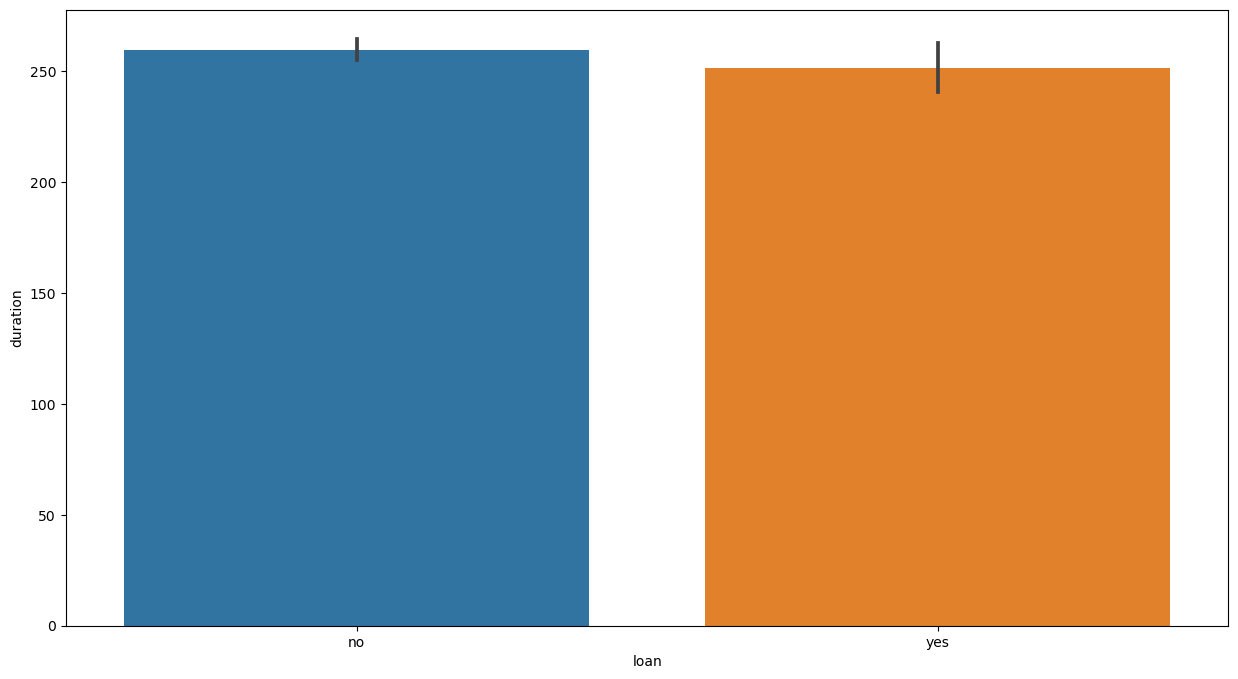

In [134]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['loan'],y=df['duration'])

In [135]:
from sklearn.preprocessing import LabelEncoder
lecode=LabelEncoder()
#X=lecode.fit_transform(x)
#X
cate=cat.apply(LabelEncoder().fit_transform)
cate

,job,marital,education,default,housing,loan,contact,month,poutcome
0,7,1,1,0,1,0,0,8,3
1,5,0,0,0,0,0,1,5,3
2,6,2,2,0,1,0,2,8,3
3,7,2,0,0,1,0,1,8,3
4,1,0,1,0,0,1,2,5,3
...,...,...,...,...,...,...,...,...,...
13559,4,1,2,0,0,0,0,1,3
13560,1,1,0,0,1,0,2,6,3
13561,5,1,0,0,1,0,0,4,3
13562,0,2,1,0,0,0,0,9,2


In [136]:
x=pd.concat([con,cate],axis=1,join='inner')
x

,ID,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,38441,32,118,15,20,6,-1,0,7,1,1,0,1,0,0,8,3
1,40403,78,2787,1,372,1,-1,0,5,0,0,0,0,0,1,5,3
2,3709,31,144,16,676,1,-1,0,6,2,2,0,1,0,2,8,3
3,37422,57,3777,13,65,2,-1,0,7,2,0,0,1,0,1,8,3
4,12527,45,-705,3,111,1,-1,0,1,0,1,0,0,1,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0,4,1,2,0,0,0,0,1,3
13560,11743,54,2281,20,158,1,-1,0,1,1,0,0,1,0,2,6,3
13561,28292,35,285,29,136,1,-1,0,5,1,0,0,1,0,0,4,3
13562,45163,29,464,9,208,2,91,3,0,2,1,0,0,0,0,9,2


In [137]:
cor=con.corr()
cor

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.018874,0.086916,-0.056813,0.026686,-0.101389,0.441437,0.321845
age,0.018874,1.000000,0.085246,-0.004622,-0.006456,0.002439,-0.027797,-0.011326
balance,0.086916,0.085246,1.000000,0.006890,0.015375,-0.020524,0.007136,0.024824
day,-0.056813,-0.004622,0.006890,1.000000,-0.025344,0.170421,-0.105314,-0.060719
duration,0.026686,-0.006456,0.015375,-0.025344,1.000000,-0.094653,-0.006308,-0.000415
campaign,-0.101389,0.002439,-0.020524,0.170421,-0.094653,1.000000,-0.091116,-0.032366
pdays,0.441437,-0.027797,0.007136,-0.105314,-0.006308,-0.091116,1.000000,0.534085
previous,0.321845,-0.011326,0.024824,-0.060719,-0.000415,-0.032366,0.534085,1.000000


In [138]:
corr=x.corr()
corr

,ID,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
ID,1.000000,0.018874,0.086916,-0.056813,0.026686,-0.101389,0.441437,0.321845,0.065762,0.070859,0.090366,-0.056901,-0.166996,-0.079589,-0.718882,-0.154451,-0.449871
age,0.018874,1.000000,0.085246,-0.004622,-0.006456,0.002439,-0.027797,-0.011326,-0.024413,-0.396771,-0.117274,-0.022243,-0.189573,-0.022863,0.024945,-0.051712,0.009334
balance,0.086916,0.085246,1.000000,0.006890,0.015375,-0.020524,0.007136,0.024824,0.012731,-0.000986,0.063001,-0.060447,-0.071759,-0.086091,-0.034654,0.012272,-0.023993
day,-0.056813,-0.004622,0.006890,1.000000,-0.025344,0.170421,-0.105314,-0.060719,0.027381,0.000419,0.033917,0.007931,-0.033407,0.003121,-0.030176,-0.018811,0.096803
duration,0.026686,-0.006456,0.015375,-0.025344,1.000000,-0.094653,-0.006308,-0.000415,0.009494,0.012563,-0.002513,-0.008022,0.009843,-0.011538,-0.030957,0.007176,0.013554
campaign,-0.101389,0.002439,-0.020524,0.170421,-0.094653,1.000000,-0.091116,-0.032366,0.019584,-0.008048,0.006523,0.012558,-0.029587,0.011501,0.012308,-0.120961,0.103644
pdays,0.441437,-0.027797,0.007136,-0.105314,-0.006308,-0.091116,1.000000,0.534085,-0.028884,0.017854,0.003763,-0.030713,0.136453,-0.028705,-0.244138,0.045672,-0.859758
previous,0.321845,-0.011326,0.024824,-0.060719,-0.000415,-0.032366,0.534085,1.000000,0.005024,0.021518,0.024317,-0.025641,0.045626,-0.016183,-0.168726,0.030520,-0.571935
job,0.065762,-0.024413,0.012731,0.027381,0.009494,0.019584,-0.028884,0.005024,1.000000,0.052579,0.158185,-0.010780,-0.125409,-0.018603,-0.090929,-0.100924,0.020020
marital,0.070859,-0.396771,-0.000986,0.000419,0.012563,-0.008048,0.017854,0.021518,0.052579,1.000000,0.110982,-0.000793,-0.012039,-0.059223,-0.036893,-0.014271,-0.010196


<AxesSubplot: >

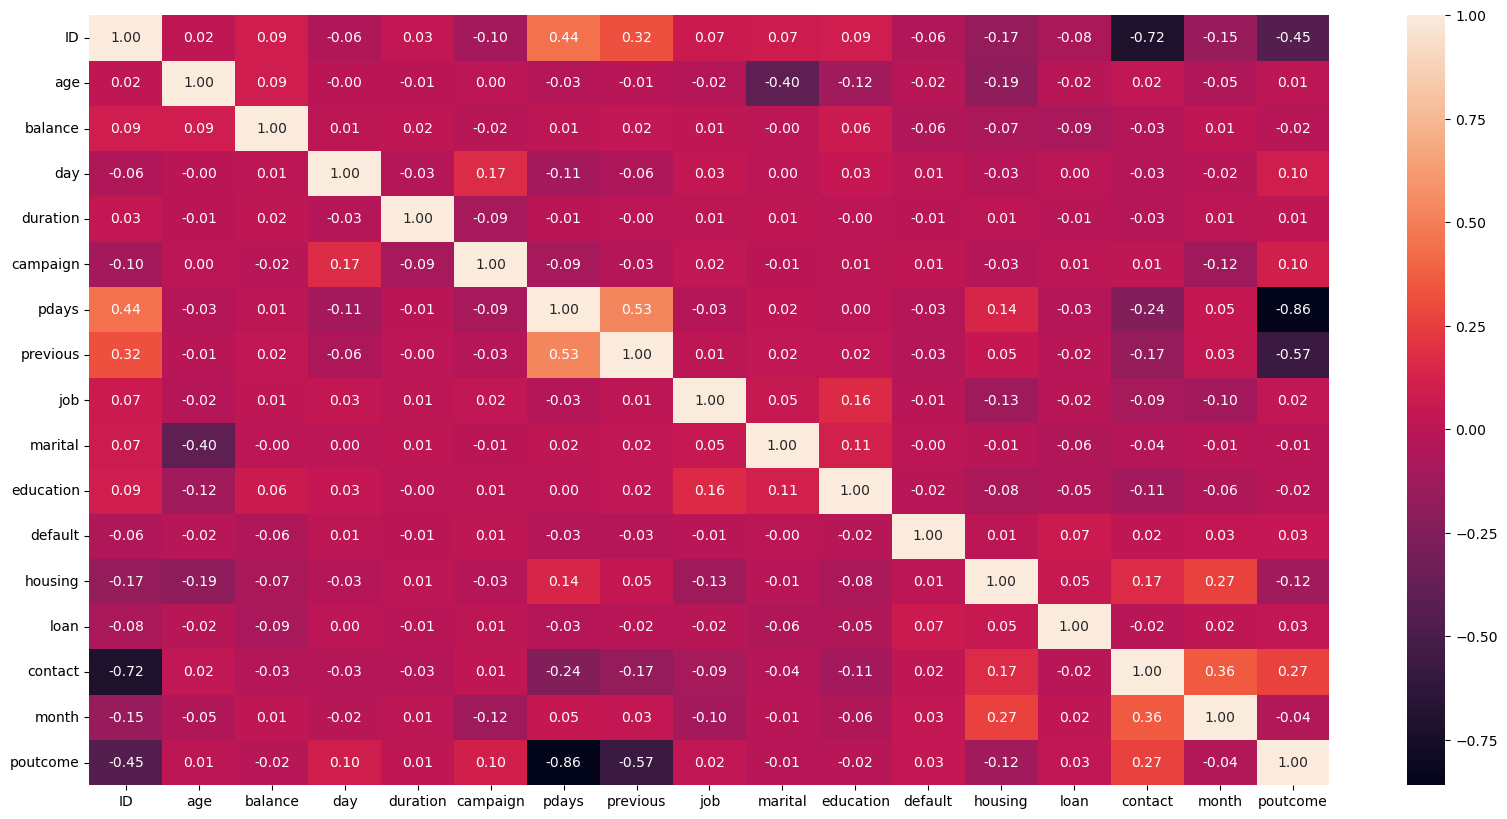

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')

In [140]:
from scipy.stats import zscore
z=np.abs(zscore(con[[ 'age']]))
threshold=3
np.where(z>3)
new_df=con[(z<3).all(axis=1)]
new_df

,ID,age,balance,day,duration,campaign,pdays,previous
0,38441,32,118,15,20,6,-1,0
2,3709,31,144,16,676,1,-1,0
3,37422,57,3777,13,65,2,-1,0
4,12527,45,-705,3,111,1,-1,0
5,16013,32,0,22,455,2,-1,0
...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0
13560,11743,54,2281,20,158,1,-1,0
13561,28292,35,285,29,136,1,-1,0
13562,45163,29,464,9,208,2,91,3


In [141]:
Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(new_df,i) for i in range(new_df.shape[1])]
Vif['features']=new_df.columns
Vif

,Vif,features
0,4.523344,ID
1,6.467923,age
2,1.218925,balance
3,4.148401,day
4,1.917169,duration
5,1.854589,campaign
6,1.864951,pdays
7,1.543335,previous


In [142]:
X=new_df.iloc[:,1:]
X

,age,balance,day,duration,campaign,pdays,previous
0,32,118,15,20,6,-1,0
2,31,144,16,676,1,-1,0
3,57,3777,13,65,2,-1,0
4,45,-705,3,111,1,-1,0
5,32,0,22,455,2,-1,0
...,...,...,...,...,...,...,...
13559,39,45,28,148,4,-1,0
13560,54,2281,20,158,1,-1,0
13561,35,285,29,136,1,-1,0
13562,29,464,9,208,2,91,3


In [143]:
Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
Vif['features']=X.columns
Vif

,Vif,features
0,5.078760,age
1,1.208826,balance
2,4.059639,day
3,1.894163,duration
4,1.854460,campaign
5,1.627119,pdays
6,1.523736,previous


In [144]:
from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer(method='yeo-johnson')
new= transform.fit_transform(con)
new

array([[ 1.14794949, -0.83054297, -0.34987665, ...,  1.4846741 ,
        -0.47913415, -0.47907256],
       [ 1.26968602,  2.5496443 ,  0.63607597, ..., -1.10575972,
        -0.47913415, -0.47907256],
       [-1.56898141, -0.95992339, -0.33596786, ..., -1.10575972,
        -0.47913415, -0.47907256],
       ...,
       [ 0.48721564, -0.46865368, -0.26642335, ..., -1.10575972,
        -0.47913415, -0.47907256],
       [ 1.55838018, -1.23367692, -0.18635201, ...,  0.13339206,
         2.06326152,  2.14121949],
       [ 0.9198013 , -1.23367692, -0.42445925, ..., -1.10575972,
         2.11141327,  1.98442826]])

In [145]:
x=pd.DataFrame(new,columns=con.columns)
x.skew().sort_values(ascending=True)

ID         -0.291772
day        -0.153240
age         0.007857
duration    0.019436
campaign    0.231562
pdays       1.609653
previous    1.610955
balance     2.258038
dtype: float64

In [146]:
x=pd.concat([x,cate],axis=1,join='inner')
x

,ID,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,1.147949,-0.830543,-0.349877,-0.001693,-2.060474,1.484674,-0.479134,-0.479073,7,1,1,0,1,0,0,8,3
1,1.269686,2.549644,0.636076,-2.093781,0.802165,-1.105760,-0.479134,-0.479073,5,0,0,0,0,0,1,5,3
2,-1.568981,-0.959923,-0.335968,0.115298,1.555360,-1.105760,-0.479134,-0.479073,6,2,2,0,1,0,2,8,3
3,1.084039,1.414890,0.940270,-0.242825,-1.058210,0.133392,-0.479134,-0.479073,7,2,0,0,1,0,1,8,3
4,-0.700164,0.520126,-2.747632,-1.691501,-0.537642,-1.105760,-0.479134,-0.479073,1,0,1,0,0,1,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.150065,-0.038159,-0.392516,1.386449,-0.240061,1.089247,-0.479134,-0.479073,4,1,2,0,0,0,0,1,3
13560,-0.767836,1.213253,0.473571,0.563344,-0.170648,-1.105760,-0.479134,-0.479073,1,1,0,0,1,0,2,6,3
13561,0.487216,-0.468654,-0.266423,1.483967,-0.328846,-1.105760,-0.479134,-0.479073,5,1,0,0,1,0,0,4,3
13562,1.558380,-1.233677,-0.186352,-0.760845,0.128628,0.133392,2.063262,2.141219,0,2,1,0,0,0,0,9,2


In [147]:
X=x.iloc[:,1:]
X

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,-0.830543,-0.349877,-0.001693,-2.060474,1.484674,-0.479134,-0.479073,7,1,1,0,1,0,0,8,3
1,2.549644,0.636076,-2.093781,0.802165,-1.105760,-0.479134,-0.479073,5,0,0,0,0,0,1,5,3
2,-0.959923,-0.335968,0.115298,1.555360,-1.105760,-0.479134,-0.479073,6,2,2,0,1,0,2,8,3
3,1.414890,0.940270,-0.242825,-1.058210,0.133392,-0.479134,-0.479073,7,2,0,0,1,0,1,8,3
4,0.520126,-2.747632,-1.691501,-0.537642,-1.105760,-0.479134,-0.479073,1,0,1,0,0,1,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.038159,-0.392516,1.386449,-0.240061,1.089247,-0.479134,-0.479073,4,1,2,0,0,0,0,1,3
13560,1.213253,0.473571,0.563344,-0.170648,-1.105760,-0.479134,-0.479073,1,1,0,0,1,0,2,6,3
13561,-0.468654,-0.266423,1.483967,-0.328846,-1.105760,-0.479134,-0.479073,5,1,0,0,1,0,0,4,3
13562,-1.233677,-0.186352,-0.760845,0.128628,0.133392,2.063262,2.141219,0,2,1,0,0,0,0,9,2


In [148]:
X

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,-0.830543,-0.349877,-0.001693,-2.060474,1.484674,-0.479134,-0.479073,7,1,1,0,1,0,0,8,3
1,2.549644,0.636076,-2.093781,0.802165,-1.105760,-0.479134,-0.479073,5,0,0,0,0,0,1,5,3
2,-0.959923,-0.335968,0.115298,1.555360,-1.105760,-0.479134,-0.479073,6,2,2,0,1,0,2,8,3
3,1.414890,0.940270,-0.242825,-1.058210,0.133392,-0.479134,-0.479073,7,2,0,0,1,0,1,8,3
4,0.520126,-2.747632,-1.691501,-0.537642,-1.105760,-0.479134,-0.479073,1,0,1,0,0,1,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.038159,-0.392516,1.386449,-0.240061,1.089247,-0.479134,-0.479073,4,1,2,0,0,0,0,1,3
13560,1.213253,0.473571,0.563344,-0.170648,-1.105760,-0.479134,-0.479073,1,1,0,0,1,0,2,6,3
13561,-0.468654,-0.266423,1.483967,-0.328846,-1.105760,-0.479134,-0.479073,5,1,0,0,1,0,0,4,3
13562,-1.233677,-0.186352,-0.760845,0.128628,0.133392,2.063262,2.141219,0,2,1,0,0,0,0,9,2


In [149]:
X.skew()

age          0.007857
balance      2.258038
day         -0.153240
duration     0.019436
campaign     0.231562
pdays        1.609653
previous     1.610955
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
housing     -0.226771
loan         1.898587
contact      0.794849
month       -0.465848
poutcome    -1.921847
dtype: float64

In [150]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-8.30542970e-01, -3.49876654e-01, -1.69342121e-03, ...,
        -7.04443732e-01,  8.29937897e-01,  4.52163079e-01],
       [ 2.54964430e+00,  6.36075971e-01, -2.09378067e+00, ...,
         4.13762796e-01, -1.65752678e-01,  4.52163079e-01],
       [-9.59923389e-01, -3.35967855e-01,  1.15297697e-01, ...,
         1.53196932e+00,  8.29937897e-01,  4.52163079e-01],
       ...,
       [-4.68653682e-01, -2.66423348e-01,  1.48396687e+00, ...,
        -7.04443732e-01, -4.97649536e-01,  4.52163079e-01],
       [-1.23367692e+00, -1.86352013e-01, -7.60844508e-01, ...,
        -7.04443732e-01,  1.16183476e+00, -5.42830432e-01],
       [-1.23367692e+00, -4.24459254e-01, -1.19378093e+00, ...,
        -7.04443732e-01,  8.29937897e-01, -2.53281745e+00]])

In [151]:
x_test = pd.DataFrame(X)
x_test

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,-0.830543,-0.349877,-0.001693,-2.060474,1.484674,-0.479134,-0.479073,7,1,1,0,1,0,0,8,3
1,2.549644,0.636076,-2.093781,0.802165,-1.105760,-0.479134,-0.479073,5,0,0,0,0,0,1,5,3
2,-0.959923,-0.335968,0.115298,1.555360,-1.105760,-0.479134,-0.479073,6,2,2,0,1,0,2,8,3
3,1.414890,0.940270,-0.242825,-1.058210,0.133392,-0.479134,-0.479073,7,2,0,0,1,0,1,8,3
4,0.520126,-2.747632,-1.691501,-0.537642,-1.105760,-0.479134,-0.479073,1,0,1,0,0,1,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.038159,-0.392516,1.386449,-0.240061,1.089247,-0.479134,-0.479073,4,1,2,0,0,0,0,1,3
13560,1.213253,0.473571,0.563344,-0.170648,-1.105760,-0.479134,-0.479073,1,1,0,0,1,0,2,6,3
13561,-0.468654,-0.266423,1.483967,-0.328846,-1.105760,-0.479134,-0.479073,5,1,0,0,1,0,0,4,3
13562,-1.233677,-0.186352,-0.760845,0.128628,0.133392,2.063262,2.141219,0,2,1,0,0,0,0,9,2


# Test.csv Prediction using Train.csv

In [160]:
Test=lr_joblib.predict(x_test)

In [161]:
Test

array([0, 1, 1, ..., 1, 1, 1])

In [162]:
#for saving the file
import joblib
joblib.dump(lg,"Test.csv.obj")

['Test.csv.obj']

# Finish

'''Basic Project steps:

Step 1. Importing data, cleaning, handling missing values, skewness, outliers, standardization (all if needed)
Step 2. Building model, checking accuracy, find best model, cross validation and gridsearch cv and saving the model.

TRAIN part:
For TRAIN part you should be completing both step 1 and step 2.
do everything and save your model.

TEST part:
For test part you need to perform all the activities you have done with TRAIN data in step 1 only.

Now load your saved model again and use the TEST data for predicting the values.
Once prediction is done, no need to do anything further.
Save the prediciton file and you are done.'''